In [22]:
import os
import pandas as pd
import numpy as np
import talib
from datetime import datetime
import mplfinance as mpf
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import statsmodels.api as sm
import baostock as bs
import pandas_ta as ta
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
mc = mpf.make_marketcolors(up='red',down='green',inherit=True)
sc = mpf.make_mpf_style(marketcolors=mc)

<div class="jumbotron">
    <p class="display-1 h1">量化交易模型</p>
    <hr class="my-4">
    <p>主讲：李岩</p>
    <p>管理学院</p>
    <p>liyan@cumtb.edu.cn</p>
</div>

# 量化交易系统

- 交易策略

<center><img src="./img/models/tradingSystem0.png" width=50%></center>

- 量化交易系统由**量化交易模型**驱动

<center><img src="./img/models/tradingSystem1.png" width=50%></center>

<center><img src="./img/models/tradingSystem2.png" width=60%></center>

<center><img src="./img/models/tradingSystem3.png" width=100%></center>

- 数据模型
    - 数据的获取、存储、处理等

- Alpha模型
    - 决定入场、离场的时机

- 风险控制模型
    - 控制损失

- 交易成本模型
    - 估计交易成本（交易手续费等）与收益

- 投资组合模型
    - 决定希望持有的品种与头寸规模

- 交易执行模型
    - 有效率、低成本的执行买卖交易指令

# 数据模型

> 数据是量化交易模型的基础

## 数据类型

<center><img src="./img/models/dataType.png" width=100%></center>

## 数据的获取

### 从第三方终端获取数据

- 典型平台
    - Wind数据库
    - [TuShare https://tushare.pro/](https://tushare.pro/)
        - 注册获得token
    - [JointQuant https://www.joinquant.com/](https://www.joinquant.com/)
        - 注册获得一年的免费使用权限

- 优缺点：
    - 优点：数据经过加工处理
    - 缺点：速度慢、数据精细度不足，例如掘金量化只提供最近3个月的tick数据

### 从交易所获取数据

- 典型接口
    - 交易接口CTP（Comprehensive Transaction Platform）[http://www.sfit.com.cn/](http://www.sfit.com.cn/)
    - 基于CTP的`Python`量化框架：[vn.py https://www.vnpy.com/](https://www.vnpy.com/)
    - openctp: [https://openctp.yuque.com/yd1gio/myxue7](https://openctp.yuque.com/yd1gio/myxue7)

- 优缺点：
    - 优点：速度快、原始数据
    - 缺点：需要自己学习接口使用，清理数据

#### 行情数据

<center><img src="./img/models/marketdata.png" width=60%></center>

#### Tick数据

- 完整记录了市场每一次交易或增加新订单的数据，记录市场上每个事件

序号|报价|数量|方向
---|---|---|---
S1|1750|1|空

序号|报价|数量|方向
---|---|---|---
S2|1752|1|空
S1|1750|1|空

序号|报价|数量|方向
---|---|---|---
S2|1752|1|空
S1|1750|1|空
B1|1748|1|多

<center><img src="./img/models/tickdata.png" width=100%></center>

<dl class="row">
    <dt class="col-md-3">快照数据（snapshot）</dt>
    <dd class="col-md-9">对tick数据按照一定频率进行切片后的统计数据，即一个时间截面的统计数据</dd>
</dl>

- 国内期货：500ms一个切片
- 国内股票：3秒一个切片

#### 市场深度

<dl class="row">
    <dt class="col-md-3">Depth of Market</dt>
    <dd class="col-md-9">在每个价格上下的<font color="red">限价买单</font>与<font color="red">限价卖单</font>的手数分布</dd>
</dl>

<center><img src="./img/models/depthOfMarket.png" width=80%></center>

- 最优卖价：所有卖价报价中的最小值

- 最优买价：所有买价报价中的最大值

#### Level 1 v.s. Level 2数据

- Level 1数据是基本行情数据

- Level 2数据=Level 1数据+深度行情数据

##### 股票

行情|交易所|数据类型|交易所实时推送频率|行情深度
:---:|:---:|:---:|:---:|:---:
Level1|上交所、深交所|快照数据|3秒1次|五档
Level2|上交所、深交所|快照数据（逐笔成交队列、委托队列）|3秒1次|十档

##### 期货

行情|交易所|数据类型|交易所实时推送频率|行情深度
:---:|:---:|:---:|:---:|:---:
Level1|中金所|快照数据|1秒2次|一档
Level1|上期所|快照数据|1秒2次|一档
Level1|大商所|快照数据|1秒2次|一档
Level1|郑商所|快照数据|1秒4次|一档
Level2|中金所|快照数据|1秒2次|五档
Level2|上期所|快照数据|1秒2次|五档
Level2|大商所|快照数据|1秒4次|五档
Level2|郑商所|快照数据|1秒4次|五档

## 数据的存储

- 数据库存储
- 本地文件存储

### 数据库存储

#### 关系型数据库

- MySQL
    - `Python`相应的包：`PyMySQL`
    - 安装 `pip install PyMySQL`

- PostgreSQL
    - 官网：[http://www.postgres.cn/](http://www.postgres.cn/)
    - `Python`相应的包：`psycopg2`
    - 安装`pip install psycopg2`

#### 非关系型数据库（NoSQL, Not only SQL）

- 非结构化数据占比急剧增大

<center><img src="./img/models/structured-data-vs-unstructured-data.png" width=80%></center>

##### NoSQL优势

- 数据存储灵活

<center><img src="./img/models/wide_column_database.png" width=100%></center>

<center><img src="./img/models/document.jpg" width=40%></center>

- 数据存储、读取效率高

- MongoDB
    - 官网：[https://www.mongodb.org.cn/](https://www.mongodb.org.cn/)
        - 社区版免费
    - `Python`相应的包：`pymongo`
    - 安装：`pip install pymongo`

#### 时序数据库

- `InfluxDB` [https://www.influxdata.com/products/influxdb-overview/](https://www.influxdata.com/products/influxdb-overview/)
    - 单机版免费
- `TimescaleDB` [https://www.timescale.com/products](https://www.timescale.com/products)

- 优势
    - 专门针对时间序列数据优化
    - 每秒能够写入、读取千万、上亿条数据

1000万条数据|`MySQL`|`InfluxDB`
---|---|---
存储|7 `min+`|2 `min+`
读取|6 `s+`|0.22 `s+`

- 多个时序时序数据库比较

<center><img src="./img/models/timeDBComp.jpg" width=60%></center>

### 本地文本文件

#### `csv`文件

```python
pd.read_csv('path_to_file.csv', encoding=None)
```
- `'path_to_file.csv`：要打开的`.csv`文件的完整路径，字符串
- `encoding`：读取的文件编码，字符串，常用`utf_8, utf_8_sig, gb2312, gbk, gb18030`
- 返回`DataFrame`对象

```python
df.to_csv('path_to_file.csv', index=True)
```
- `'path_to_file.csv'`：保存的以`.csv`结尾的文件的完整路径
- `index`：是否把行索引写入到`.csv`文件中，默认是写入

- 不足
    - 单张表存储的数据规模受限
        - 1048576行，16384列
    - 内存消耗大

#### `hdf5`文件

- Hierarchical Data Format，一种跨平台的数据存储文件
- 一般以`.h5`或者`.hdf5`作为文件的后缀名
- 写入、读取速度快，压缩后文件体积小

##### `hdf5`文件结构

- 数据以类似于文件夹的形式组织，包括`group`和`dataset`两种对象类型
- 每一种对象还可以增加**元数据**（`metadata`），描述该对象的额外信息

<center><img src="./img/models/hdf5_structure.jpg" width=80%></center>

In [6]:
with pd.HDFStore('./data/models/2019-12-06_08-54.h5') as h5store:
    h5store.groups()

[/ActionDay (Group) ''
   children := ['table' (Table)],
 /TradingDay (Group) ''
   children := ['table' (Table)],
 /options/CF003C11600 (Group) ''
   children := ['meta' (Group), 'table' (Table)],
 /options/CF003C11800 (Group) ''
   children := ['meta' (Group), 'table' (Table)],
 /options/CF003C12000 (Group) ''
   children := ['meta' (Group), 'table' (Table)],
 /options/CF003C12200 (Group) ''
   children := ['meta' (Group), 'table' (Table)],
 /options/CF003C12400 (Group) ''
   children := ['meta' (Group), 'table' (Table)],
 /options/CF003C12600 (Group) ''
   children := ['meta' (Group), 'table' (Table)],
 /options/CF003C12800 (Group) ''
   children := ['meta' (Group), 'table' (Table)],
 /options/CF003C13000 (Group) ''
   children := ['meta' (Group), 'table' (Table)],
 /options/CF003C13200 (Group) ''
   children := ['meta' (Group), 'table' (Table)],
 /options/CF003C13400 (Group) ''
   children := ['meta' (Group), 'table' (Table)],
 /options/CF003C13600 (Group) ''
   children := ['meta'

- `hdf5`相对于`csv`的优势

1亿行，5列数据|`csv`|`hdf5`
---|---|---
存储速度|775 `s+`|16 `s+`
存储体积|900 `M+`|400 `M+`（未启用压缩）
读取速度|104 `s+`|8 `s+`


##### `hdf5`文件的读取

```python
pip install tables
import pandas as pd
pd.read_hdf(path, key=None, mode='r', where=None, start=None, stop=None)
```
- `path`：需要读取的`hdf5`文件的完整路径
- `key`：组（group）的名称标识
- `mode`：读取方式，可以取值：`r`只读，`r+`读写，`a`追加写入
- `where`：读取的条件，`str`类型
- `start`：读取的起始行数，`int`类型
- `end`：读取的结束行数，`int`类型
- 返回`dataframe`数据类型

In [4]:
# 读取Tick数据
tickdf = pd.read_hdf('./data/models/2019-12-06_08-54.h5',key='futures/rb2001',mode='r+')
tickdf.head()
tickdf.shape

,LastPrice,Volume,Turnover,OpenInterest,UpdateTime,UpdateMillisec,BidPrice1,BidVolume1,AskPrice1,AskVolume1
0,3586.0,358344,1.284419e+10,1710176.0,09:00:00,500,3588.0,3,3589.0,71
1,3588.0,358394,1.284598e+10,1710174.0,09:00:01,0,3587.0,36,3588.0,8
2,3588.0,358458,1.284828e+10,1710174.0,09:00:01,500,3588.0,30,3589.0,67
3,3589.0,358628,1.285438e+10,1710130.0,09:00:02,0,3588.0,9,3589.0,115
4,3589.0,358736,1.285826e+10,1710198.0,09:00:02,500,3588.0,9,3589.0,104


(15787, 10)

In [8]:
# 筛选读取，并列条件
tickdffil = pd.read_hdf('./data/models/2019-12-06_08-54.h5',key='futures/rb2001',mode='r+',where='(UpdateTime>"10:15:00")&(UpdateTime<="11:00:00")')
tickdffil

,LastPrice,Volume,Turnover,OpenInterest,UpdateTime,UpdateMillisec,BidPrice1,BidVolume1,AskPrice1,AskVolume1
8913,3612.0,652198,2.343467e+10,1662114.0,10:30:00,500,3612.0,262,3613.0,57
8914,3612.0,652206,2.343496e+10,1662106.0,10:30:01,0,3612.0,340,3613.0,57
8915,3613.0,652246,2.343640e+10,1662106.0,10:30:01,500,3612.0,339,3613.0,44
8916,3612.0,652280,2.343763e+10,1662092.0,10:30:02,0,3612.0,368,3613.0,50
8917,3613.0,652322,2.343915e+10,1662096.0,10:30:02,500,3612.0,402,3613.0,43
...,...,...,...,...,...,...,...,...,...,...
12437,3608.0,736072,2.646419e+10,1655614.0,10:59:58,500,3607.0,152,3608.0,251
12438,3607.0,736078,2.646440e+10,1655608.0,10:59:59,0,3607.0,159,3608.0,251
12439,3607.0,736078,2.646440e+10,1655608.0,10:59:59,500,3607.0,159,3608.0,251
12440,3608.0,736080,2.646447e+10,1655606.0,11:00:00,0,3607.0,159,3608.0,250


In [9]:
# 筛选读取，或条件
tickdffil1 = pd.read_hdf('./data/models/2019-12-06_08-54.h5',key='futures/rb2001',mode='r+',where='(UpdateTime=="10:15:00")|(UpdateTime=="11:00:00")')
tickdffil1

,LastPrice,Volume,Turnover,OpenInterest,UpdateTime,UpdateMillisec,BidPrice1,BidVolume1,AskPrice1,AskVolume1
8911,3612.0,652046,2.342918e+10,1662136.0,10:15:00,0,3612.0,274,3613.0,19
8912,3612.0,652046,2.342918e+10,1662136.0,10:15:00,500,3612.0,274,3613.0,19
12440,3608.0,736080,2.646447e+10,1655606.0,11:00:00,0,3607.0,159,3608.0,250
12441,3608.0,736180,2.646808e+10,1655598.0,11:00:00,500,3607.0,152,3608.0,235


##### `hdf5`文件的存储

```python
DataFrame.to_hdf(path, key, mode='a', complevel=None, append=False, format=None,data_columns=None)
```
- `path`：以`.h5`为后缀存储文件的完整路径
- `key`：`group`的名称
- `complevel`：压缩等级，`int`类型，取值为$0\sim 9$，数字越大，压缩程度越高
- `append`：是否允许在现有的文件中追加内容
- `format`：数据存储的格式，`str`类型，可以是`fixed`或者`table`
    - `fixed`：读取/存储速度快，但是不允许`append`
    - `table`：允许`append`以及在读取的时候筛选
- `data_columns`：`list`类型，要存储的列的名称；或者`True`，存储所有的列。**如果希望能够用在读取的时候筛选，必须设置该参数**

In [43]:
tickdf.to_hdf('./data/models/rb2001.h5',key='rb',mode='w',complevel=9)

In [44]:
res = pd.read_hdf('./data/models/rb2001.h5',key='rb',mode='r',where='UpdateTime=="10:30:00"')
res

TypeError: cannot pass a where specification when reading from a Fixed format store. this store must be selected in its entirety

In [45]:
tickdf.to_hdf('./data/models/rb2001_tab.h5',key='rb',mode='w',complevel=9,append=True,format='table',data_columns=True)

In [47]:
resTab = pd.read_hdf('./data/models/rb2001_tab.h5',key='rb',mode='r',where='UpdateTime=="10:31:00"')
resTab

,LastPrice,Volume,Turnover,OpenInterest,UpdateTime,UpdateMillisec,BidPrice1,BidVolume1,AskPrice1,AskVolume1
9031,3609.0,655688,2.356070e+10,1661692.0,10:31:00,0,3609.0,60,3610.0,438
9032,3609.0,655688,2.356070e+10,1661692.0,10:31:00,500,3609.0,76,3610.0,446


## 数据处理

- 噪声数据，即无意义的或错误的数据，既浪费存储空间，更严重的是导致错误的分析结果

### 缺失数据

#### 检查是否含有缺失值

- 在Python中用`NaN`（Not a Number）表示缺失值

In [10]:
rbDat = pd.read_csv('./data/models/rbNan.csv',index_col=0)
rbDat.head()
rbDat.shape

,Close,High,Low
ActionDay,,,
20160104,1775.0,1806.0,1773.0
20160105,1779.0,NaN,1761.0
20160106,1783.0,1786.0,1766.0
20160107,NaN,1786.0,1747.0
20160108,1752.0,1775.0,NaN


(1150, 3)

- 对于`pandas`的`DataFrame`结构，检验是否含有缺失值的方法
    - `DataFrame.isna()`

In [11]:
rbDat.isna()

,Close,High,Low
ActionDay,,,
20160104,False,False,False
20160105,False,True,False
20160106,False,False,False
20160107,True,False,False
20160108,False,False,True
...,...,...,...
20200826,False,False,False
20200827,False,False,False
20200828,False,False,False


- 显示含有缺失值的行

In [12]:
rbDat.loc[rbDat.isna().any(axis=1),:]

,Close,High,Low
ActionDay,,,
20160105,1779.0,NaN,1761.0
20160107,NaN,1786.0,1747.0
20160108,1752.0,1775.0,NaN
20160513,NaN,2064.0,2001.0
20161013,2354.0,NaN,2331.0
20170314,3597.0,3624.0,NaN
20170919,NaN,NaN,NaN
20180702,NaN,3807.0,3737.0
20190920,3392.0,NaN,3378.0


```python
    DataFrame.any(axis=0)
```
- 数据框的行或列是否含有`True`，若含有`True`则返回值为`True`，否则，返回值为`False`
- `axis`：0表示按行，1表示按列

#### 删除缺失值

- `DataFrame`删除缺失值的方法
    - `DataFrame.dropna(axis=0, how='any', inplace=False)`
        - `axis`：取值为0，删除含有缺失值的行；取值为1，删除含有缺失值的列
        - `how`：取值为`any`，只要含有缺失值，就删除相应的行或列；取值为`all`，只有行或列的所有元素都是缺失值，才会删除该行或列
        - `inplace`：是否更新原始的`DataFrame`

In [13]:
rbRem = rbDat.dropna(how='all')
rbRem.shape

(1149, 3)

#### 填充缺失值

- `DataFrame`填充缺失值方法
```python
DataFrame.fillna(value=None, method=None, axis=None, inplace=False, limit=None)
```
    + `value`：用于填充缺失值的**标量值**或**字典对象**
        * 标量值：所有缺失值均填相同的数值
        * 字典对象：按**列**填充不同的缺失值
    + `method`：填充方式
        * `pad`或`ffill`：前向替换，用缺失值的前一个有效值替换该缺失值
        * `backfill`或`bfill`：后向替换，用缺失值的后一个有效值替换该缺失值
    + `limit`：前向或者后向填充的最大连续缺失值的数量

In [14]:
rbFill = rbDat.fillna(method='ffill')
rbFill

,Close,High,Low
ActionDay,,,
20160104,1775.0,1806.0,1773.0
20160105,1779.0,1806.0,1761.0
20160106,1783.0,1786.0,1766.0
20160107,1783.0,1786.0,1747.0
20160108,1752.0,1775.0,1747.0
...,...,...,...
20200826,3787.0,3793.0,3771.0
20200827,3768.0,3796.0,3761.0
20200828,3787.0,3789.0,3766.0


### 奇点数据

- 奇点指价格异常、突然的波动

- 可以通过剔除，或者平滑（移动平均）的方法消除

### 期货合约换月

- 由于近、远月合约的价格存在**升贴水**，造成在换月当日价格出现**不连续的缺口**

In [5]:
rbdf = pd.read_csv('./data/models/rbChangeContractNew.csv',index_col=0,parse_dates=[0])
# index_col=0, 指定第0列作为生成的DataFrame的行标签
# parse_dates=[0]，将第0列转换为时间格式
rbdf 

,Open,High,Low,Close,Contract
Date,,,,,
2020-02-03 08:59:00,3233,3233,3233,3233,rb2005
2020-02-03 09:00:00,3233,3233,3233,3233,rb2005
2020-02-03 09:01:00,3233,3233,3233,3233,rb2005
2020-02-03 09:02:00,3233,3253,3233,3252,rb2005
2020-02-03 09:03:00,3253,3270,3246,3270,rb2005
...,...,...,...,...,...
2020-09-01 14:10:00,3805,3808,3805,3806,rb2009
2020-09-01 14:11:00,3806,3807,3806,3807,rb2009
2020-09-01 14:12:00,3807,3807,3806,3806,rb2009


- 2020-03-25 14:15:00换月，从rb2005换到rb2009

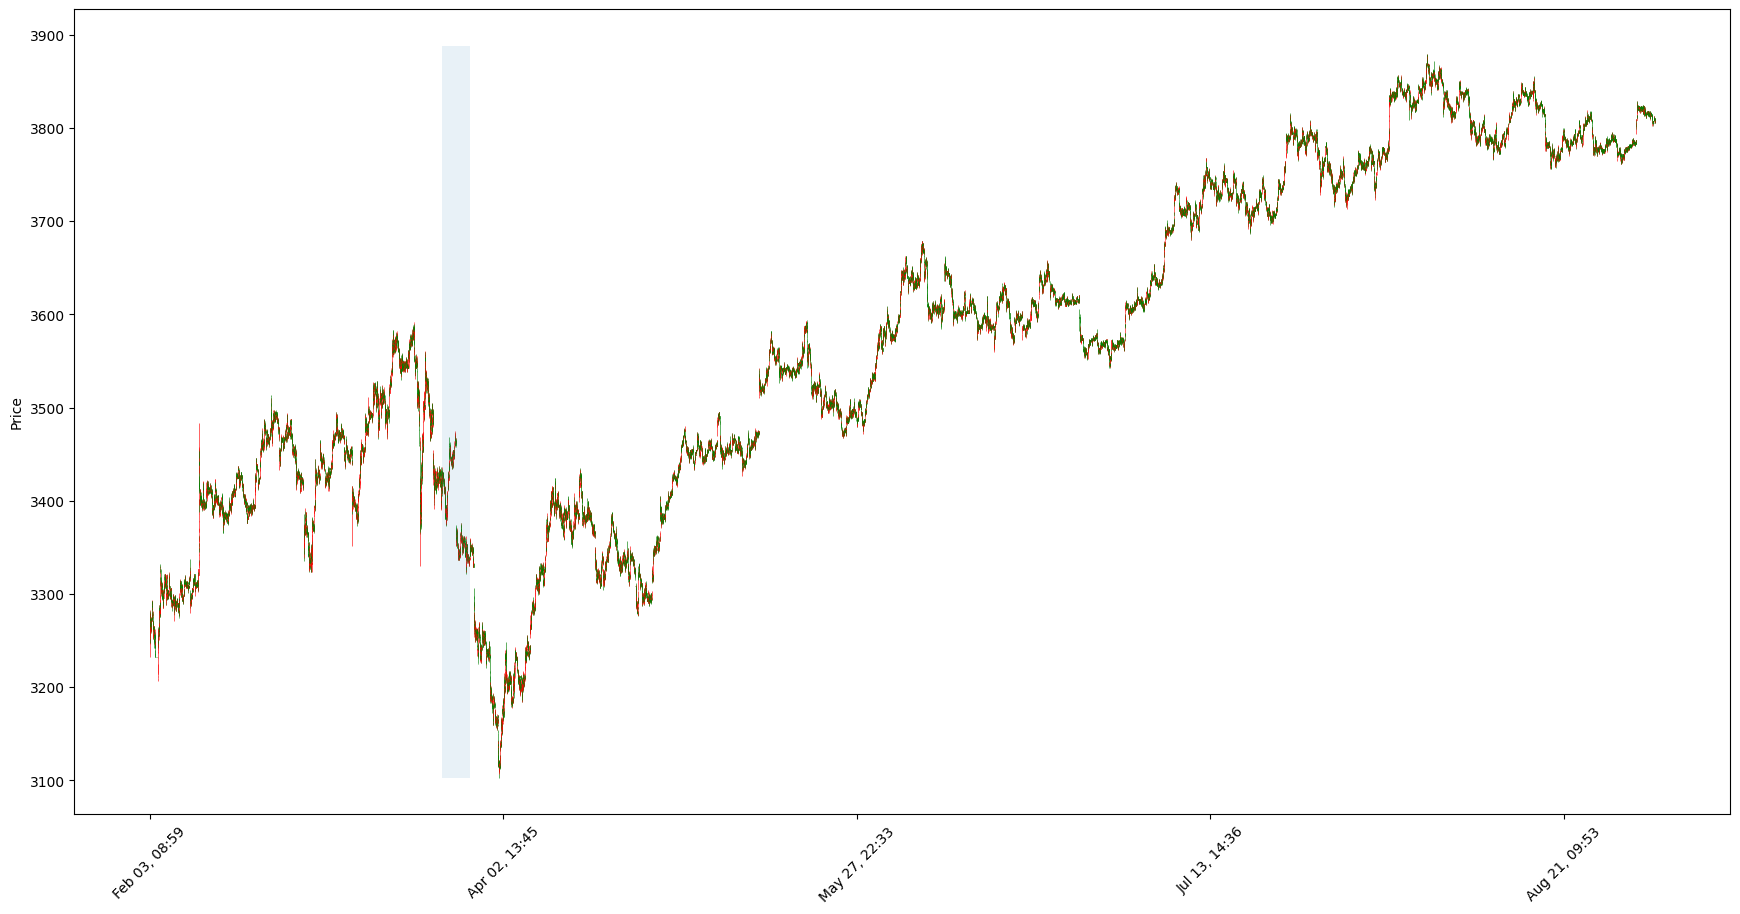

In [21]:
mpf.plot(rbdf,type='candle',style=sc,figratio=(18,9),figscale=2,vlines=dict(vlines="2020-03-25 14:14:00",linewidths=20,alpha=0.1))

#### 调整方法

In [184]:
rbdf.loc[(rbdf.index=="2020-03-25 14:14:00") | (rbdf.index=="2020-03-25 14:15:00"),:]

,Open,High,Low,Close
Date,,,,
2020-03-25 14:14:00,3461.0,3461.0,3458.0,3459.0
2020-03-25 14:15:00,3374.0,3374.0,3369.0,3370.0


- 以第一个历史合约的价格为基准，计算新合约相对于上一个合约的价格升贴水

In [185]:
rbdfAdj = rbdf.copy()
rbdfAdj.loc[rbdf.index>="2020-03-25 14:15:00",'Open'] += 89
rbdfAdj.loc[rbdf.index>="2020-03-25 14:15:00",'High'] += 89
rbdfAdj.loc[rbdf.index>="2020-03-25 14:15:00",'Low'] += 89
rbdfAdj.loc[rbdf.index>="2020-03-25 14:15:00",'Close'] += 89

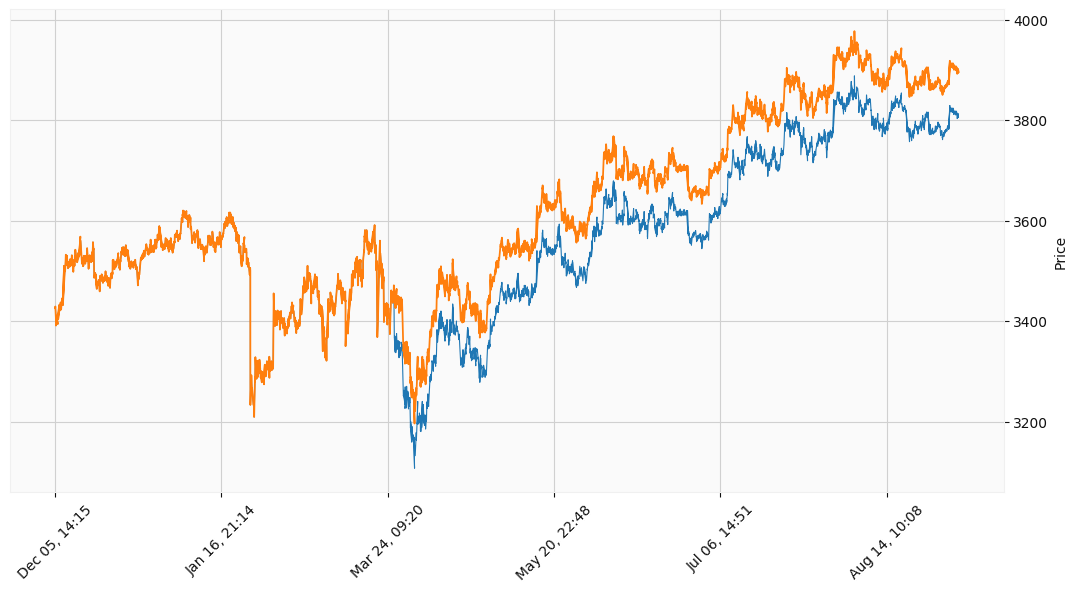

In [187]:
adj = mpf.make_addplot(rbdfAdj['Close'])
mpf.plot(rbdf,type='line',style='yahoo',addplot=adj,figratio=(12,6),figscale=1.2)

- 以最新合约的价格为基准，计算前一个合约相对于后一个合约价格的升贴水

In [188]:
rbdfAdj1 = rbdf.copy()
rbdfAdj1.loc[rbdf.index<="2020-03-25 14:14:00",'Open'] -= 89
rbdfAdj1.loc[rbdf.index<="2020-03-25 14:14:00",'High'] -= 89
rbdfAdj1.loc[rbdf.index<="2020-03-25 14:14:00",'Low'] -= 89
rbdfAdj1.loc[rbdf.index<="2020-03-25 14:14:00",'Close'] -= 89

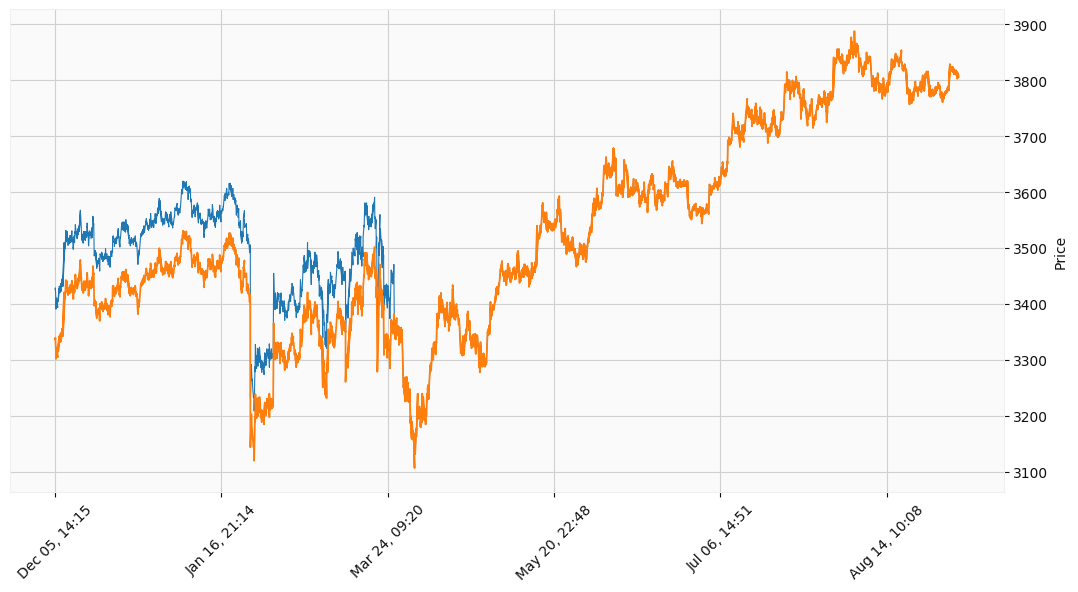

In [190]:
adj1 = mpf.make_addplot(rbdfAdj1['Close'])
mpf.plot(rbdf,type='line',style='yahoo',addplot=adj1,figratio=(12,6),figscale=1.2)

### 股票价格复权

- 股票的复权价格：考虑到市场收盘后可能对股票价格产生影响的因素而将股价调整后的价格

- 影响因素：派发现金股利和股票股利

#### 前复权

- 以**除权后**第一天的价格点为基础，把**除权以前**的数据进行复权

#### 后复权

- 以**除权前**最后一天的价格点为基础，把**除权后**的数据进行复权

# Alpha模型

- Alpha意味着获取**超额收益**

<center><img src="./img/models/alphaModels.png" width=100%></center>

## 趋势追踪模型

- 在趋势初期入场，在趋势末期离场

- 技术指标是识别趋势的重要方法

### 技术指标的概念

> 基于价格、成交量、持仓量等的历史数据而构建的启发式或数学计算指标


- [https://www.visualcapitalist.com/12-types-technical-indicators-stocks/](https://www.visualcapitalist.com/12-types-technical-indicators-stocks/)
- [https://www.theforexchronicles.com/the-4-different-types-of-technical-indicators-that-you-can-use/](https://www.theforexchronicles.com/the-4-different-types-of-technical-indicators-that-you-can-use/)

#### 技术指标的分类

- 根据技术指标的具体内容
    - 趋势指标
    - 能量指标
    - 波动性指标
    - 交易量指标

#### 技术指标计算包

- TA-Lib金融软件包是目前最常用的技术指标函数库，包括150多个技术指标

- 下载安装包[https://gitee.com/FIRC/pythonlibs_whl_mirror](https://gitee.com/FIRC/pythonlibs_whl_mirror)

- 从本地安装TA-Lib，

```python
pip install d:/TA_Lib-0.4.19-cp39-cp39-win_amd64.whl
```
- 使用TA-Lib包的方法，

``` python
import talib
```

- `pandas_ta`：基于`pandas`扩展的技术分析指标库，包含130多个技术指标
- [https://twopirllc.github.io/pandas-ta/](https://twopirllc.github.io/pandas-ta/)

- 安装方法

```python
pip install pandas-ta
```

- 使用

```python
import pandas_ta as ta
```

### 趋势指标（trend indicators）

- 通过将标的资产的价格与基准比较（通常是均值），判断趋势的方向与强度
    - 价格超过均值，上升趋势
    - 价格跌破均值，下跌趋势

- 包括
    - 简单移动平均
    - 指数移动平均
    - MACD
    - 。。。

#### 简单移动平均（simple moving average, SMA)

$$SMA_t(n)=\frac{1}{n}\sum_{i=0}^{n-1}p_{t-i}$$

- 其中, $p_t$是$t$时刻的价格，$n$可以取3分钟、5分钟、15分钟，60分钟等。

##### 读取价格数据

In [8]:
rbdf = pd.read_csv('./data/models/rbChangeContract.csv')
rbdf.shape
rbdf.head()

(54314, 5)

,Date,Open,High,Low,Close
0,2019-12-05 14:15:00,3423.0,3427.0,3422.0,3426.0
1,2019-12-05 14:16:00,3426.0,3428.0,3424.0,3427.0
2,2019-12-05 14:17:00,3428.0,3428.0,3426.0,3426.0
3,2019-12-05 14:18:00,3426.0,3427.0,3425.0,3427.0
4,2019-12-05 14:19:00,3427.0,3428.0,3426.0,3427.0


- 合并成日度交易数据

In [9]:
# 获取交易日期
rbdf['ActionDay'] =pd.to_datetime(rbdf['Date']).dt.date
rbdf

,Date,Open,High,Low,Close,ActionDay
0,2019-12-05 14:15:00,3423.0,3427.0,3422.0,3426.0,2019-12-05
1,2019-12-05 14:16:00,3426.0,3428.0,3424.0,3427.0,2019-12-05
2,2019-12-05 14:17:00,3428.0,3428.0,3426.0,3426.0,2019-12-05
3,2019-12-05 14:18:00,3426.0,3427.0,3425.0,3427.0,2019-12-05
4,2019-12-05 14:19:00,3427.0,3428.0,3426.0,3427.0,2019-12-05
...,...,...,...,...,...,...
54309,2020-09-01 14:10:00,3805.0,3808.0,3805.0,3806.0,2020-09-01
54310,2020-09-01 14:11:00,3806.0,3807.0,3806.0,3807.0,2020-09-01
54311,2020-09-01 14:12:00,3807.0,3807.0,3806.0,3806.0,2020-09-01
54312,2020-09-01 14:13:00,3806.0,3807.0,3806.0,3807.0,2020-09-01


##### 合成日交易数据

In [10]:
rbdf=rbdf.groupby('ActionDay').agg({'Open':'first','High':'max','Low':'min','Close':'last'})
rbdf

,Open,High,Low,Close
ActionDay,,,,
2019-12-05,3423.0,3429.0,3387.0,3405.0
2019-12-06,3405.0,3484.0,3403.0,3472.0
2019-12-09,3472.0,3534.0,3469.0,3509.0
2019-12-10,3510.0,3544.0,3496.0,3536.0
2019-12-11,3535.0,3570.0,3513.0,3523.0
...,...,...,...,...
2020-08-26,3778.0,3793.0,3771.0,3787.0
2020-08-27,3790.0,3796.0,3761.0,3768.0
2020-08-28,3768.0,3789.0,3766.0,3787.0


In [11]:
# 将index转换成时间格式
rbdf.index = pd.to_datetime(rbdf.index)

##### 计算SMA

In [12]:
rSMA = talib.SMA(rbdf['Close'], timeperiod=30)
rSMA

ActionDay
2019-12-05            NaN
2019-12-06            NaN
2019-12-09            NaN
2019-12-10            NaN
2019-12-11            NaN
                 ...     
2020-08-26    3788.600000
2020-08-27    3790.666667
2020-08-28    3792.400000
2020-08-31    3795.733333
2020-09-01    3796.300000
Length: 181, dtype: float64

> 注意：talib各个指标函数要求输入数据是**浮点型**数据

In [13]:
# pandas-ta标准使用方式

rSMA = ta.sma(rbdf['Close'], length=30)
rSMA

ActionDay
2019-12-05            NaN
2019-12-06            NaN
2019-12-09            NaN
2019-12-10            NaN
2019-12-11            NaN
                 ...     
2020-08-26    3788.600000
2020-08-27    3790.666667
2020-08-28    3792.400000
2020-08-31    3795.733333
2020-09-01    3796.300000
Name: SMA_30, Length: 181, dtype: float64

```python
# pandas-ta作为pandas的扩展
```

- `df.ta`应用*ohlcva*数据计算相应的技术指标，不需要指定用那一列数据，例如

```python
df.ta.sma(length=10,append=True)
```

- `append=True`：将计算好的技术指标添加到`df`，作为新的一列

In [18]:
rSMA = rbdf.ta.sma(length=30)
rSMA

ActionDay
2019-12-05            NaN
2019-12-06            NaN
2019-12-09            NaN
2019-12-10            NaN
2019-12-11            NaN
                 ...     
2020-08-26    3788.600000
2020-08-27    3790.666667
2020-08-28    3792.400000
2020-08-31    3795.733333
2020-09-01    3796.300000
Name: SMA_30, Length: 181, dtype: float64

In [19]:
rbdf['SMA']=rSMA
rbdf

,Open,High,Low,Close,jma,SMA
ActionDay,,,,,,
2019-12-05,3423.0,3429.0,3387.0,3405.0,NaN,NaN
2019-12-06,3405.0,3484.0,3403.0,3472.0,NaN,NaN
2019-12-09,3472.0,3534.0,3469.0,3509.0,NaN,NaN
2019-12-10,3510.0,3544.0,3496.0,3536.0,NaN,NaN
2019-12-11,3535.0,3570.0,3513.0,3523.0,NaN,NaN
...,...,...,...,...,...,...
2020-08-26,3778.0,3793.0,3771.0,3787.0,3823.970084,3788.600000
2020-08-27,3790.0,3796.0,3761.0,3768.0,3822.554213,3790.666667
2020-08-28,3768.0,3789.0,3766.0,3787.0,3820.808724,3792.400000


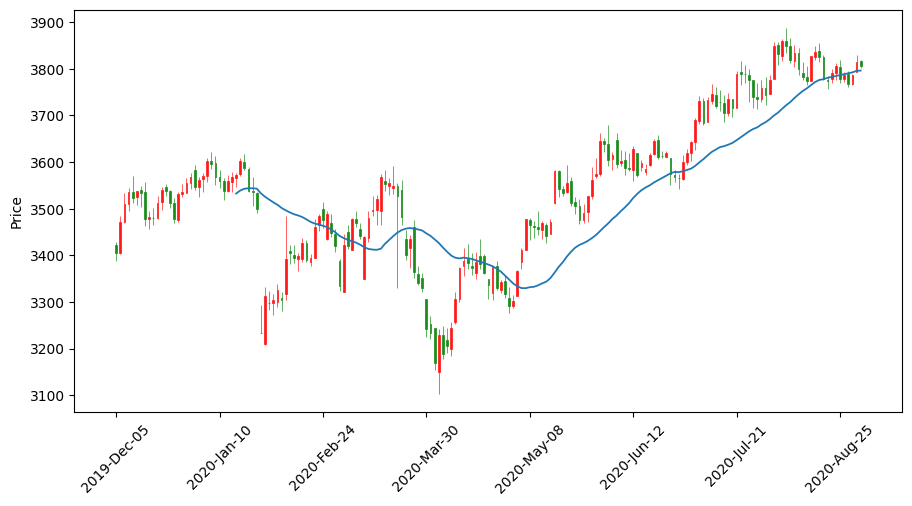

In [22]:
# 绘制sma
smaFig = mpf.make_addplot(rbdf['SMA'])
mpf.plot(rbdf,type='candle',style=sc,addplot=smaFig,figratio=(12,6),figscale=1)

#### 指数移动平均（exponential moving average, EMA）

$$EMA_t(\alpha)=\alpha EMA_{t-1}+(1-\alpha)p_t$$

- 其中，$\alpha\in(0,1)$，$p_t$为$t$时刻价格

In [20]:
# 计算EMA
rEMA = talib.EMA(rbdf['Close'], timeperiod=30)
rbdf['EMA'] = rEMA
rbdf.head()

,Open,High,Low,Close,jma,SMA,EMA
ActionDay,,,,,,,
2019-12-05,3423.0,3429.0,3387.0,3405.0,NaN,NaN,NaN
2019-12-06,3405.0,3484.0,3403.0,3472.0,NaN,NaN,NaN
2019-12-09,3472.0,3534.0,3469.0,3509.0,NaN,NaN,NaN
2019-12-10,3510.0,3544.0,3496.0,3536.0,NaN,NaN,NaN
2019-12-11,3535.0,3570.0,3513.0,3523.0,NaN,NaN,NaN


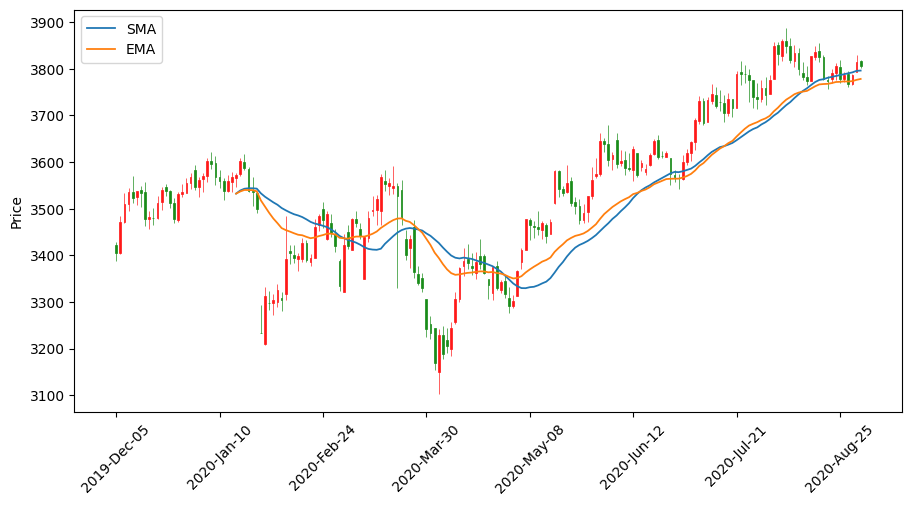

In [77]:
#将EMA与SMA同时绘制
mvFig = [mpf.make_addplot(rbdf['SMA']),
          mpf.make_addplot(rbdf['EMA'])]
fig,ax = mpf.plot(rbdf,type='candle',style=sc,addplot=mvFig,figratio=(12,6),figscale=1, returnfig=True)
ax[0].legend(['SMA','EMA'],loc='upper left')

##### EMA与SMA比较

- EMA给最新价格和历史价格不同的权重，而SMA同等对待每个价格

- EMA利用所有历史价格信息，只是随着时间推移，历史价格信息的影响在逐渐减少，而SMA只用到了时间窗口内的价格信息

#### JMA (Jurik moving average)

- 自适应移动平均线
- [http://jurikres.com/catalog1/ms_ama.htm](http://jurikres.com/catalog1/ms_ama.htm)

```python
ta.jma(close, length=None, phase=None, offset=None, **kwargs)
```
- `length`：`int`类型，移动均值的时间窗口长度
- `phase`：`float`类型，取值范围[-100,100]，新值在移动平均中的权重
- `offset`：`int`类型，移动均线横向偏离的时间长度

In [34]:
jma = ta.jma(rbdf['Close'],length=30)
rbdf['jma'] = jma

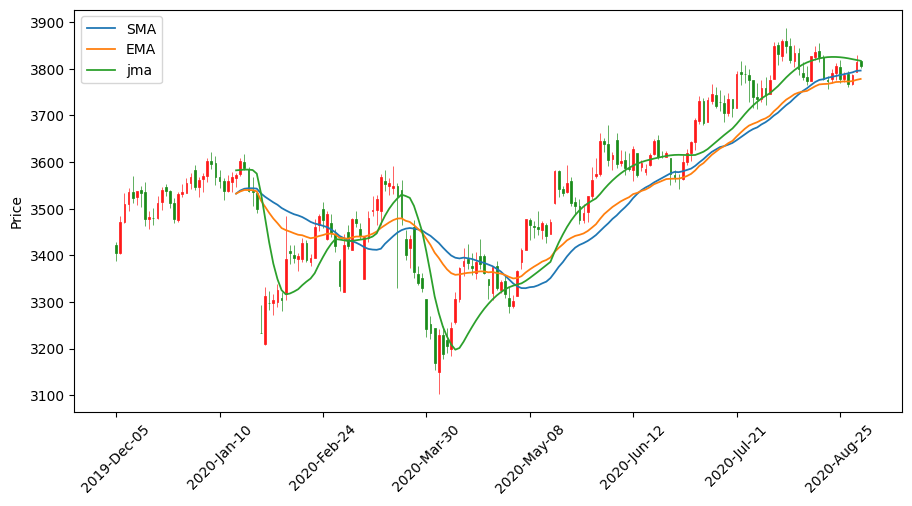

In [35]:
mvFig = [mpf.make_addplot(rbdf['SMA']),
          mpf.make_addplot(rbdf['EMA']),
        mpf.make_addplot(rbdf['jma'])]
fig,ax = mpf.plot(rbdf,type='candle',style=sc,addplot=mvFig,figratio=(12,6),figscale=1, returnfig=True)
ax[0].legend(['SMA','EMA','jma'],loc='upper left')

#### MACD（Moving Average Convergence and Divergence)

- MACD称为异同移动平均线，由双指数移动平均线构成。
- 利用收盘价的短期（常用为12日）指数移动平均线与长期（常用为26日）指数移动平均线之间的聚合与分离状况，对买进、卖出时机作出研判。

- **MACD线**： $12\text{-day 价格EMA} - 26\text{-day 价格EMA}$
- **信号线**： $9\text{-day MACD线的EMA}$

- **MACD 柱状图**： $\text{MACD线} - \text{Signal线}$

In [79]:
macd, macdsignal, macdhist = talib.MACD(rbdf['Close'], fastperiod=12, slowperiod=26, signalperiod=9)

In [37]:
help(ta.macd)

Help on function macd in module pandas_ta.momentum.macd:

macd(close, fast=None, slow=None, signal=None, talib=None, offset=None, **kwargs)
    Moving Average Convergence Divergence (MACD)
    
    The MACD is a popular indicator to that is used to identify a security's trend.
    While APO and MACD are the same calculation, MACD also returns two more series
    called Signal and Histogram. The Signal is an EMA of MACD and the Histogram is
    the difference of MACD and Signal.
    
    Sources:
        https://www.tradingview.com/wiki/MACD_(Moving_Average_Convergence/Divergence)
        AS Mode: https://tr.tradingview.com/script/YFlKXHnP/
    
    Calculation:
        Default Inputs:
            fast=12, slow=26, signal=9
        EMA = Exponential Moving Average
        MACD = EMA(close, fast) - EMA(close, slow)
        Signal = EMA(MACD, signal)
        Histogram = MACD - Signal
    
        if asmode:
            MACD = MACD - Signal
            Signal = EMA(MACD, signal)
          

In [80]:
rbdf['macd'] = macd
rbdf['macdsignal'] = macdsignal
rbdf['macdhist'] = macdhist
rbdf

,Open,High,Low,Close,SMA,EMA,macd,macdsignal,macdhist
ActionDay,,,,,,,,,
2019-12-05,3423.0,3429.0,3387.0,3405.0,NaN,NaN,NaN,NaN,NaN
2019-12-06,3405.0,3484.0,3403.0,3472.0,NaN,NaN,NaN,NaN,NaN
2019-12-09,3472.0,3534.0,3469.0,3509.0,NaN,NaN,NaN,NaN,NaN
2019-12-10,3510.0,3544.0,3496.0,3536.0,NaN,NaN,NaN,NaN,NaN
2019-12-11,3535.0,3570.0,3513.0,3523.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2020-08-26,3778.0,3793.0,3771.0,3787.0,3788.600000,3773.117551,14.611584,23.863201,-9.251618
2020-08-27,3790.0,3796.0,3761.0,3768.0,3790.666667,3772.787387,11.358643,21.362290,-10.003647
2020-08-28,3768.0,3789.0,3766.0,3787.0,3792.400000,3773.704329,10.196269,19.129086,-8.932817


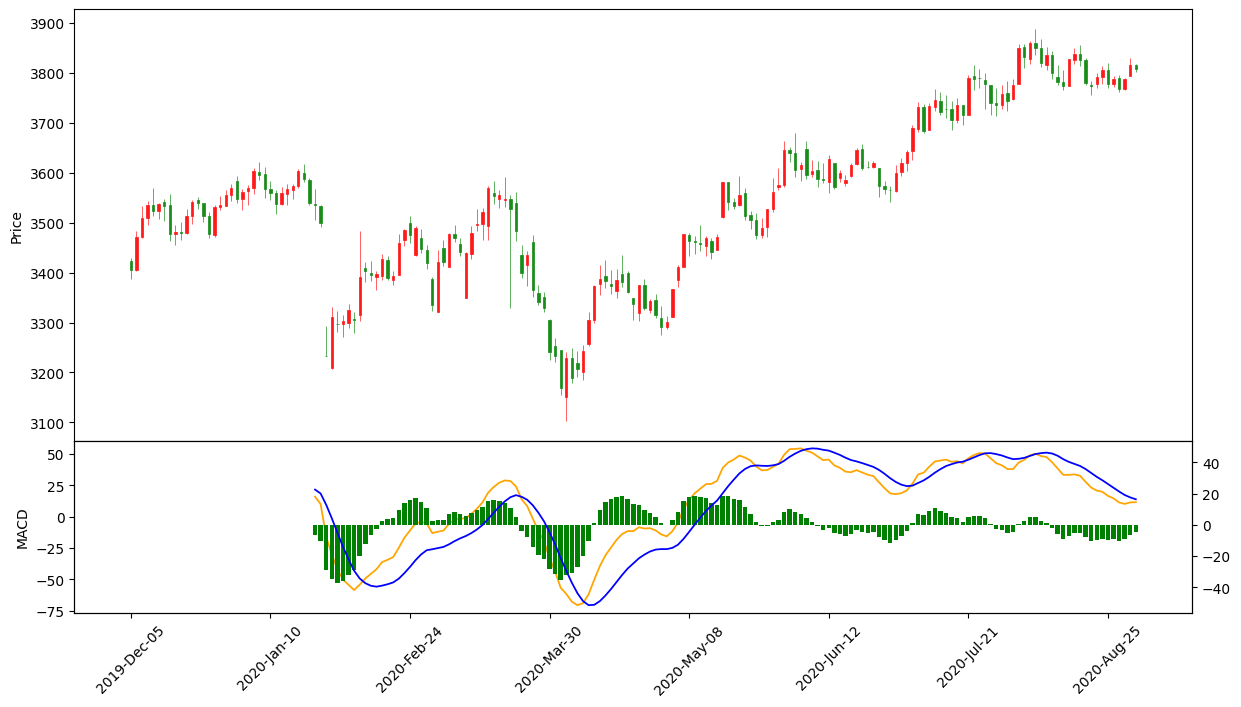

In [88]:
macdFig = [mpf.make_addplot(rbdf['macd'],panel=1,color='orange',ylabel='MACD'),
          mpf.make_addplot(rbdf['macdsignal'],panel=1,color='blue'),
          mpf.make_addplot(rbdf['macdhist'],type='bar',color='green',panel=1)]
mpf.plot(rbdf,type='candle',style=sc,addplot=macdFig,figratio=(18,10),figscale=1.5)

In [39]:
macd = ta.macd(rbdf['Close'],fast=12,slow=26,signal=9,talib=False)
macd

,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9
ActionDay,,,
2019-12-05,NaN,NaN,NaN
2019-12-06,NaN,NaN,NaN
2019-12-09,NaN,NaN,NaN
2019-12-10,NaN,NaN,NaN
2019-12-11,NaN,NaN,NaN
...,...,...,...
2020-08-26,14.611584,-9.251618,23.863201
2020-08-27,11.358643,-10.003647,21.362290
2020-08-28,10.196269,-8.932817,19.129086


In [47]:
hcolors = ['green' if each<=0 else 'red' for each in macd['MACDh_12_26_9']]

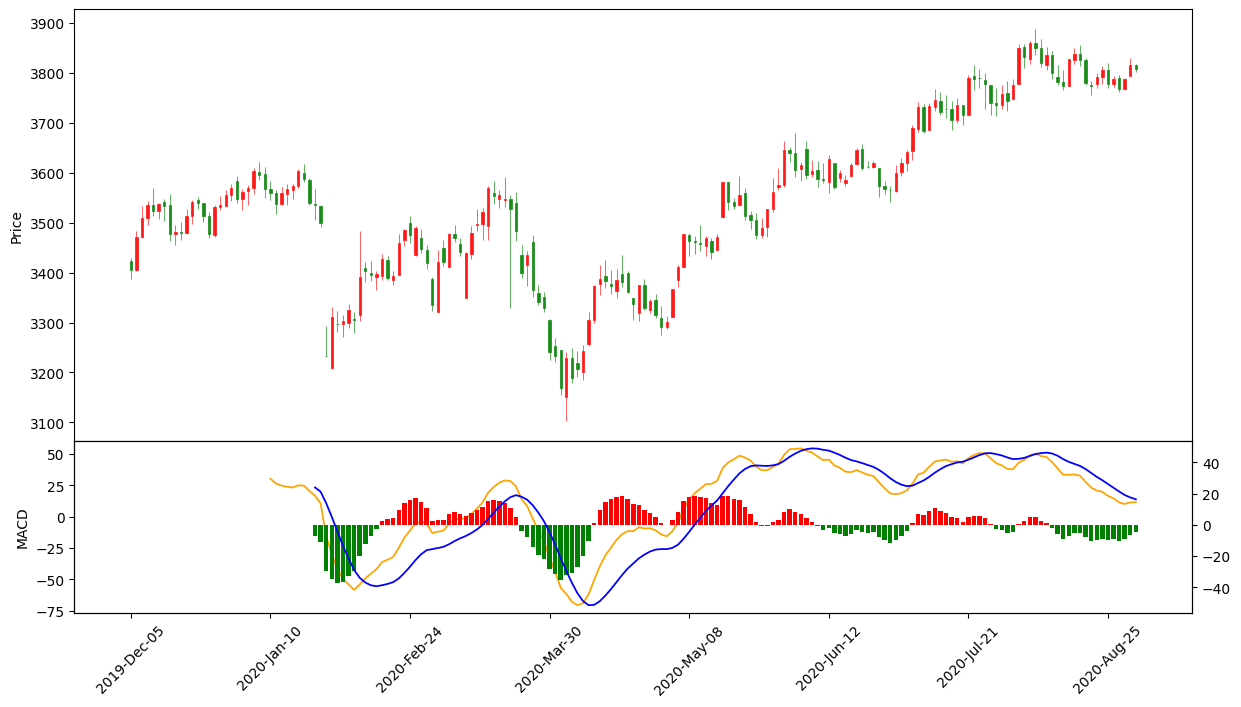

In [48]:
macdFig = [mpf.make_addplot(macd['MACD_12_26_9'],panel=1,color='orange',ylabel='MACD'),
          mpf.make_addplot(macd['MACDs_12_26_9'],panel=1,color='blue'),
          mpf.make_addplot(macd['MACDh_12_26_9'],type='bar',color=hcolors,panel=1)]
mpf.plot(rbdf,type='candle',style=sc,addplot=macdFig,figratio=(18,10),figscale=1.5)

- 当**MACD线**向上穿越**信号线**，做多信号
- 当**MADC线**向下穿越**信号线**，做空信号

### 能量指标（momentum indicators）

- 通过衡量价格上涨或下跌的变化幅度
- 帮助判别趋势的强度

#### 相对强度指数（relative strength index, RSI）

- 计算一段时间内价格向上波动占价格绝对波动的比例

```python
if close(t) > close(t-1):
    up = close(t)-close(t-1)
    dn = 0
else:
    up = 0
    dn = close(t-1)-close(t)
# close(t)是t时刻的收盘价
```

\begin{align}
  upavg = \frac{upavg\times(t-1)+up}{t} \\
  dnavg = \frac{dnavg\times(t-1)+dn}{t} \\
  RSI = \frac{upavg}{upavg+dnavg}\times100
\end{align}
- 其中，$upavg$是价格上涨幅度的均值，$dnavg$价格下跌幅度的均值

- 波动范围是$[0,100]$

In [84]:
rRSI = talib.RSI(rbdf['Close'], timeperiod=14)
rbdf['RSI'] = rRSI
rbdf

,Open,High,Low,Close,SMA,EMA,macd,macdsignal,macdhist,RSI
ActionDay,,,,,,,,,,
2019-12-05,3423.0,3429.0,3387.0,3405.0,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-06,3405.0,3484.0,3403.0,3472.0,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-09,3472.0,3534.0,3469.0,3509.0,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-10,3510.0,3544.0,3496.0,3536.0,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-11,3535.0,3570.0,3513.0,3523.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2020-08-26,3778.0,3793.0,3771.0,3787.0,3788.600000,3773.117551,14.611584,23.863201,-9.251618,51.407498
2020-08-27,3790.0,3796.0,3761.0,3768.0,3790.666667,3772.787387,11.358643,21.362290,-10.003647,48.257801
2020-08-28,3768.0,3789.0,3766.0,3787.0,3792.400000,3773.704329,10.196269,19.129086,-8.932817,51.460542


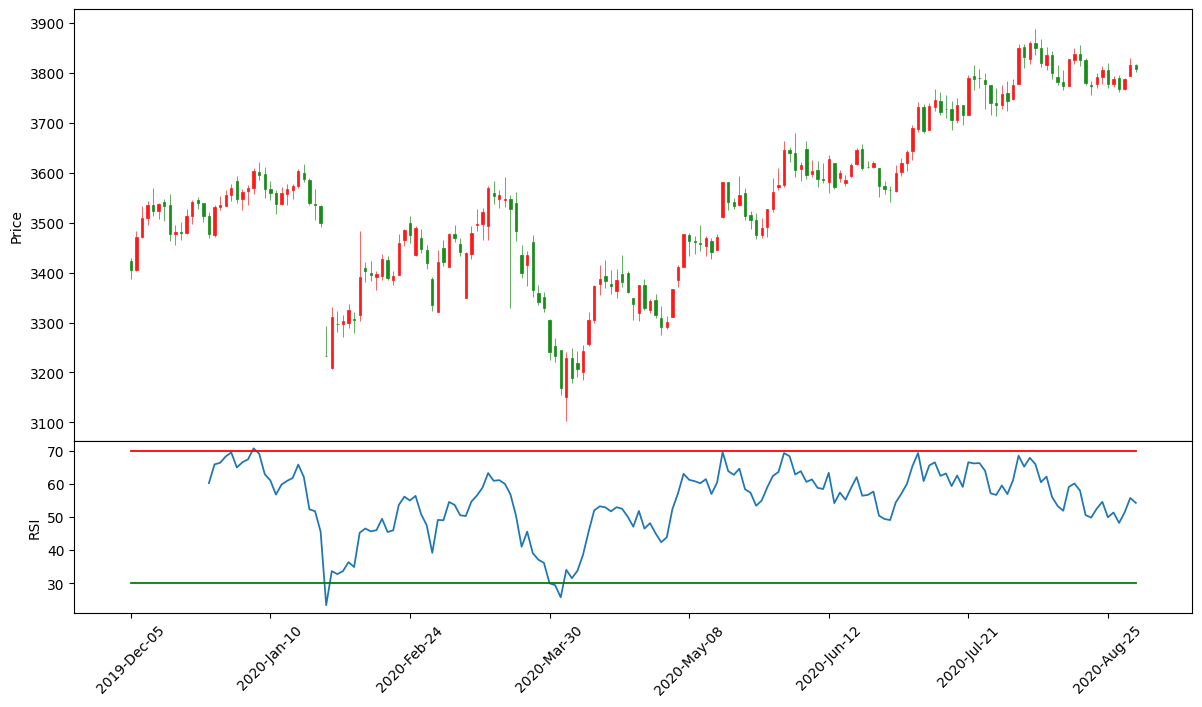

In [87]:
line70 = np.ones(rbdf.shape[0])*70
line30 = np.ones(rbdf.shape[0])*30
rsiFig = [mpf.make_addplot(rbdf['RSI'],panel=1,ylabel='RSI'),
          mpf.make_addplot(line70,panel=1,color='red',secondary_y=False),
          mpf.make_addplot(line30,panel=1,color='green',secondary_y=False),         
         ]
mpf.plot(rbdf,type='candle',style=sc,addplot=rsiFig,figratio=(18,10),figscale=1.5)

- $\text{RSI}>70$：超买(overbought)，标的的**交易价格**<font color="red">超过</font>其**内在价值**(intrinsic value)或市场价值，意味着价格近期将会调整
- $\text{RSI}<30$：超卖(oversold)，标的**交易价格**<font color="green">低于</font>其**内在价值**或市场价值，意味着价格近期将会调整

- 在上升区间，RSI应当稳定在30以上，并且经常触碰70
- 在下跌区间，RSI应当几乎不超过70，并且经常触碰30

#### 商品通道指数（commodity channel index）

- 用来识别趋势的开始点与结束点

$$
\text{CCI}=\frac{\text{TP}-\text{ATP}}{0.015\times\text{MD}}
$$

- $\text{TP}=\frac{high_n+low_n+close}{3}$：典型价格（typical price）
- $high_n$：$n$个周期内的最高价
- $low_n$：$n$个周期内的最低价
- $\text{ATP}$：典型价格的简单移动平均
- $MD=\frac{\sum_n|\text{TP}-\text{ATP}|}{n}$：典型价格平均离差

In [89]:
rCCI = talib.CCI(rbdf['High'], rbdf['Low'], rbdf['Close'], timeperiod=14)

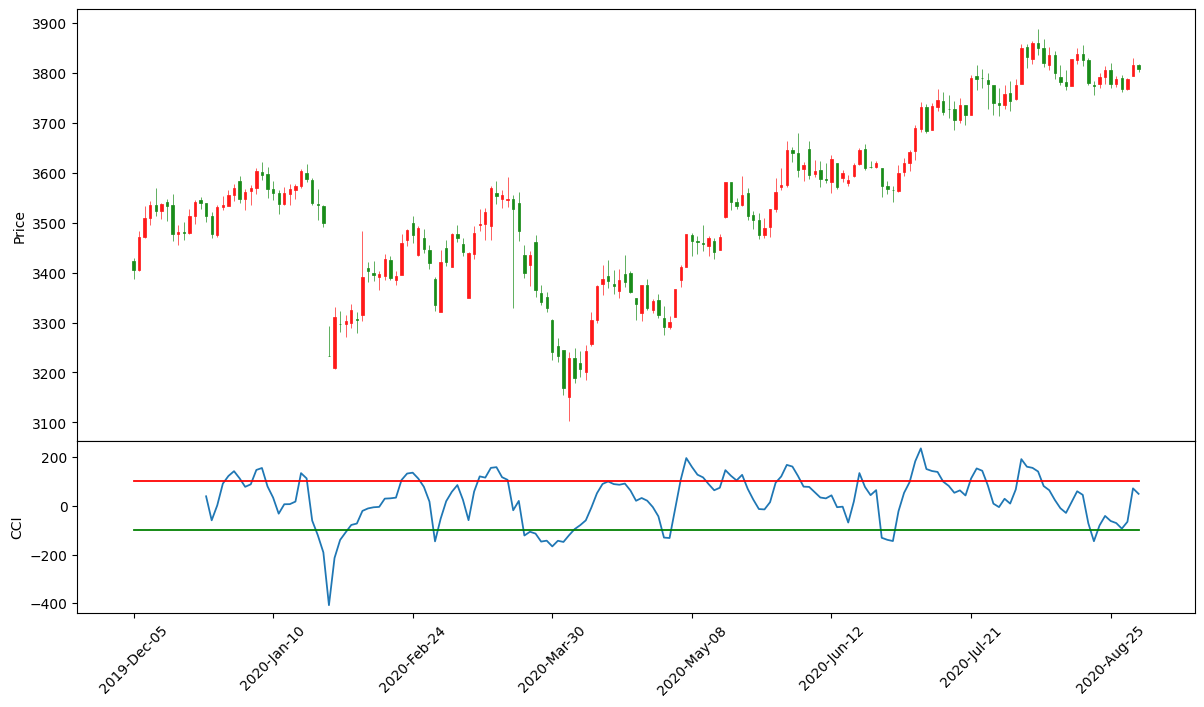

In [91]:
line100 = np.ones(rbdf.shape[0])*100
linen100 = np.ones(rbdf.shape[0])*(-100)
cciFig = [mpf.make_addplot(rCCI,panel=1,ylabel='CCI'),
          mpf.make_addplot(line100,panel=1,color='red',secondary_y=False),
          mpf.make_addplot(linen100,panel=1,color='green',secondary_y=False),         
         ]
mpf.plot(rbdf,type='candle',style=sc,addplot=cciFig,figratio=(18,10),figscale=1.5)

- 当CCI由负值超过100，意味着出现上升趋势
- 当CCI由正值跌破-100，意味着出现下跌趋势

### 波动性指标（volatility indicators）

- 衡量价格波动程度

#### 布林带（Bollinger Bands）

> 价格在移动均线上下附近增加了波动性的带状图形。其中波动性的计算是基于不断变化的标准差

- 中线（Middle Band） = 20天移动平均
- 上线（Upper Band） = 中线 + 2倍20天价格标准差
- 下线（Lower Band） = 中线 - 2倍20天价格标准差

In [93]:
upperband, middleband, lowerband = talib.BBANDS(rbdf['Close'], timeperiod=5, nbdevup=2, nbdevdn=2, matype=0)

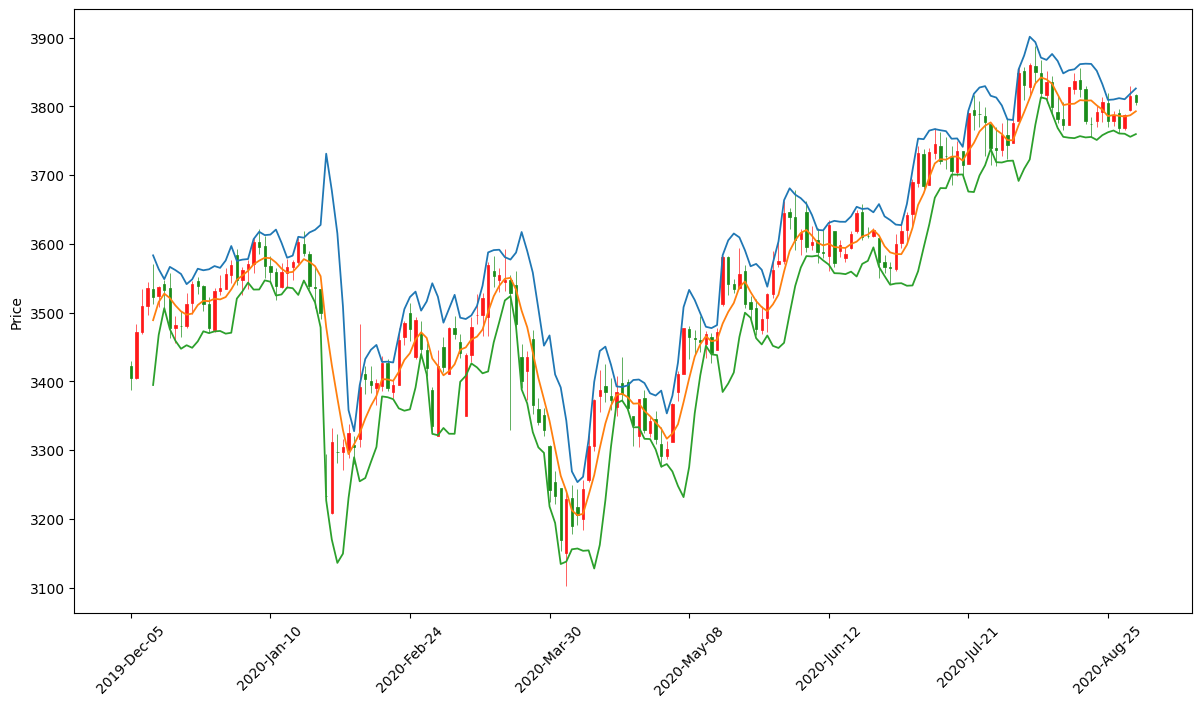

In [94]:
bbandsFig = [mpf.ma werband),         
         ]
mpf.plot(rbdf,type='candle',style=sc,addplot=bbandsFig,figratio=(18,10),figscale=1.5)

- 如果价格波动性增加，布林带就会变宽；相反，价格波动性降低，布林带就会收缩

- 在价格上升阶段，价格会在**中线**和**上线**之间波动
    - 一旦价格跌破中线，有可能开始下跌
    - 下线即为下跌的目标价位

- 在价格下跌阶段，价格会在**中线**和**下线**之间波动
    - 一旦价格突破中线，有可能开始上涨
    - 上线即为上涨的目标价位

#### 平均真实变动范围（average true range）

In [92]:
rATR = talib.ATR(rbdf['High'], rbdf['Low'], rbdf['Close'], timeperiod=14)
rATR

ActionDay
2019-12-05          NaN
2019-12-06          NaN
2019-12-09          NaN
2019-12-10          NaN
2019-12-11          NaN
                ...    
2020-08-26    44.539432
2020-08-27    43.858044
2020-08-28    42.368184
2020-08-31    42.341885
2020-09-01    40.460322
Length: 181, dtype: float64

### 交易量指标（volume indicators）

- 利用交易量衡量价格趋势的强度，以及对价格方向的确认

#### On-balance volume (OBV)

- 做多与做空成交量的累计和

```python
if close(t)>close(t-1):
    OBV(t) = OBV(t-1) + volume
elif close(t)<close(t-1):
    OBV(t) = OBV(t-1) - volume
else:
    OBV(t) = OBV(t-1)
```

In [95]:
rbdaily = pd.read_csv('./data/tradingBasics/rb2010.csv')
rbdaily['Date'] = pd.to_datetime(rbdaily['Date'],format='%Y-%m-%d %H:%M')
rbdaily.set_index('Date',inplace=True)
rbdaily.head()

,Open,High,Low,Close,Volume
Date,,,,,
2020-08-07 09:01:00,3849.0,3860.0,3849.0,3859.0,16100
2020-08-07 09:02:00,3858.0,3861.0,3857.0,3857.0,4654
2020-08-07 09:03:00,3858.0,3861.0,3857.0,3859.0,6055
2020-08-07 09:04:00,3860.0,3861.0,3857.0,3858.0,3773
2020-08-07 09:05:00,3858.0,3859.0,3857.0,3857.0,1718


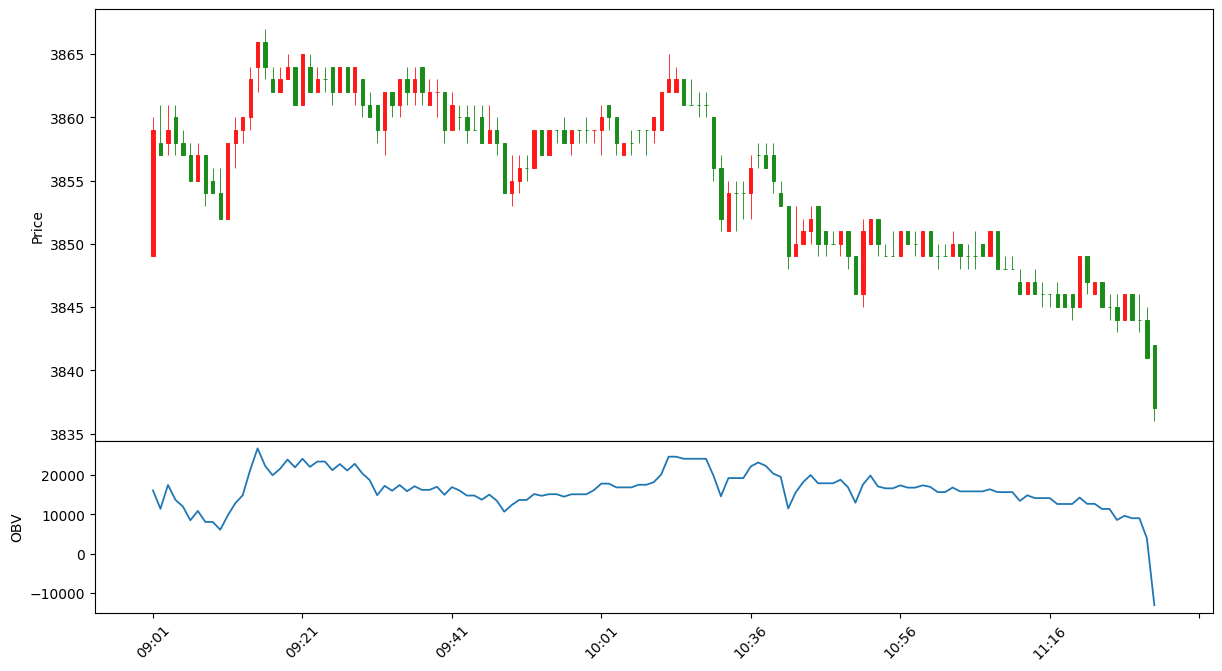

In [97]:
rOBV = talib.OBV(rbdaily['Close'], rbdaily['Volume'])
obvFig = mpf.make_addplot(rOBV,panel=1,ylabel='OBV')
mpf.plot(rbdaily,type='candle',style=sc,addplot=obvFig,figratio=(18,10),figscale=1.5)

- OBV显示出一系列上升的尖峰，表明较强的上涨趋势
- OBV显示出一系列下跌的谷底，表明较强的下跌趋势

#### Chaikin oscillator

- Accumulation/Distribution Line （ADL）：类似于OBV，只是累加或减去的是$\text{当期成交量}\times \text{收盘价位置指数}$
- 收盘价位置指数（close location value, CLV)的计算方法为

$$\text{CLV} = \frac{(\text{close}-\text{low})-(\text{high}-\text{close})}{\text{high}-\text{low}}$$
- Chaikin oscillator：ADL的$n$周期移动平均$-$ADL的$m$周期移动平均

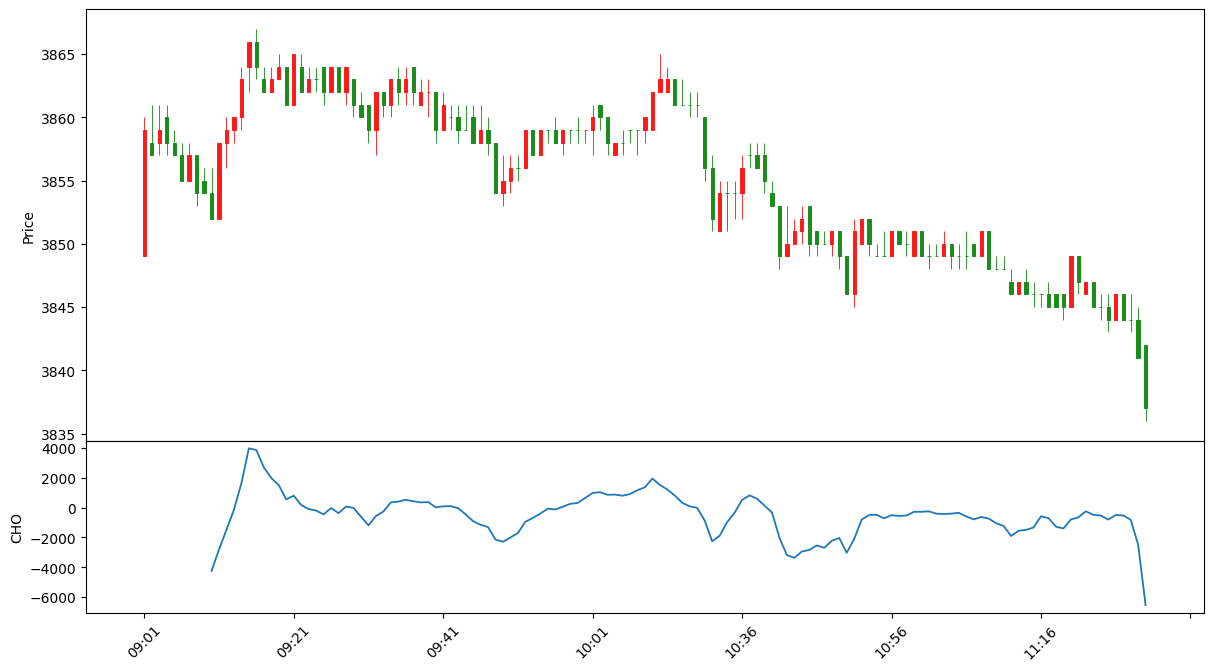

In [99]:
rCHO = talib.ADOSC(rbdaily['High'], rbdaily['Low'], rbdaily['Close'], rbdaily['Volume'], fastperiod=3, slowperiod=10)
choFig = mpf.make_addplot(rCHO,panel=1,ylabel='CHO')
mpf.plot(rbdaily,type='candle',style=sc,addplot=choFig,figratio=(18,10),figscale=1.5)

- 当Chaikin oscillator为正值，表明买方压力积聚，意味着上涨趋势
- 当Chaikin oscillator为负值，表明卖方压力积聚，意味着下跌趋势

## 均值回归模型

### 理论基础

> 标的资产的价格总是围绕着其内在价值波动，一旦趋势结束，价格必然出现反方向运动，回到价值附近

- 常用的实现方式
    > 配对交易（套利）

- 原因
    - 单一资产的内在价值较难确定
    - 对于两个高度相关资产，一种资产的价格就可以近似成为另一种资产的内在价值

### `Python`实现

```python
pip install statsmodels
import statsmodels.api as sm
coint_t, pvalue, crit_value = sm.tsa.stattools.coint(y0, y1)
```
- `y0`与`y1`：需要检验的两个价格序列
- `coint_t`：对回归残差单位根检验的`t`统计量
- `pvalue`：单位根检验的显著性水平
- `crit_value`：单位根检验分别在1%、5%、10%上的临界值

- 原假设：**没有协整关系**
- 备择假设：存在协整关系

### Apple和Google股票价格协整检验

In [50]:
retAapl = web.DataReader('AAPL',start=datetime(2018,1,1),end=(datetime(2024,11,28)),data_source='stooq')
retAapl.head()
retGoog = web.DataReader('GOOG',start=datetime(2018,1,1),end=(datetime(2024,11,28)),data_source='stooq')
retGoog.head()

,Open,High,Low,Close,Volume
Date,,,,,
2024-11-27,234.465,235.6900,233.8101,234.93,33498439.0
2024-11-26,233.330,235.5700,233.3300,235.06,45986189.0
2024-11-25,231.460,233.2450,229.7400,232.87,90152832.0
2024-11-22,228.060,230.7199,228.0600,229.87,38168252.0
2024-11-21,228.880,230.1550,225.7103,228.52,42108327.0


,Open,High,Low,Close,Volume
Date,,,,,
2024-11-27,170.680,171.1400,169.67,170.82,12433371
2024-11-26,169.490,171.4950,169.43,170.62,14937478
2024-11-25,167.990,170.4600,167.40,169.43,21395652
2024-11-22,167.160,168.2645,165.71,166.57,24497042
2024-11-21,175.455,175.5800,165.31,169.24,38839431


In [51]:
retAapl.sort_index(inplace=True)
retAapl.head()
retGoog.sort_index(inplace=True)
retGoog.head()

,Open,High,Low,Close,Volume
Date,,,,,
2018-01-02,40.0746,40.5774,39.8625,40.5685,1.083579e+08
2018-01-03,40.6328,41.1048,40.4953,40.5616,1.251186e+08
2018-01-04,40.6347,40.8558,40.5251,40.7534,9.489577e+07
2018-01-05,40.8479,41.3043,40.7594,41.2125,1.001930e+08
2018-01-08,41.0613,41.3586,40.9647,41.0713,8.717407e+07


,Open,High,Low,Close,Volume
Date,,,,,
2018-01-02,52.4170,53.3470,52.2615,53.2450,24728020
2018-01-03,53.2155,54.3145,53.1605,54.1240,28597660
2018-01-04,54.4000,54.6785,54.2000,54.3200,20074800
2018-01-05,54.7000,55.2125,54.6000,55.1115,25578420
2018-01-08,55.1115,55.5635,55.0810,55.3470,20935380


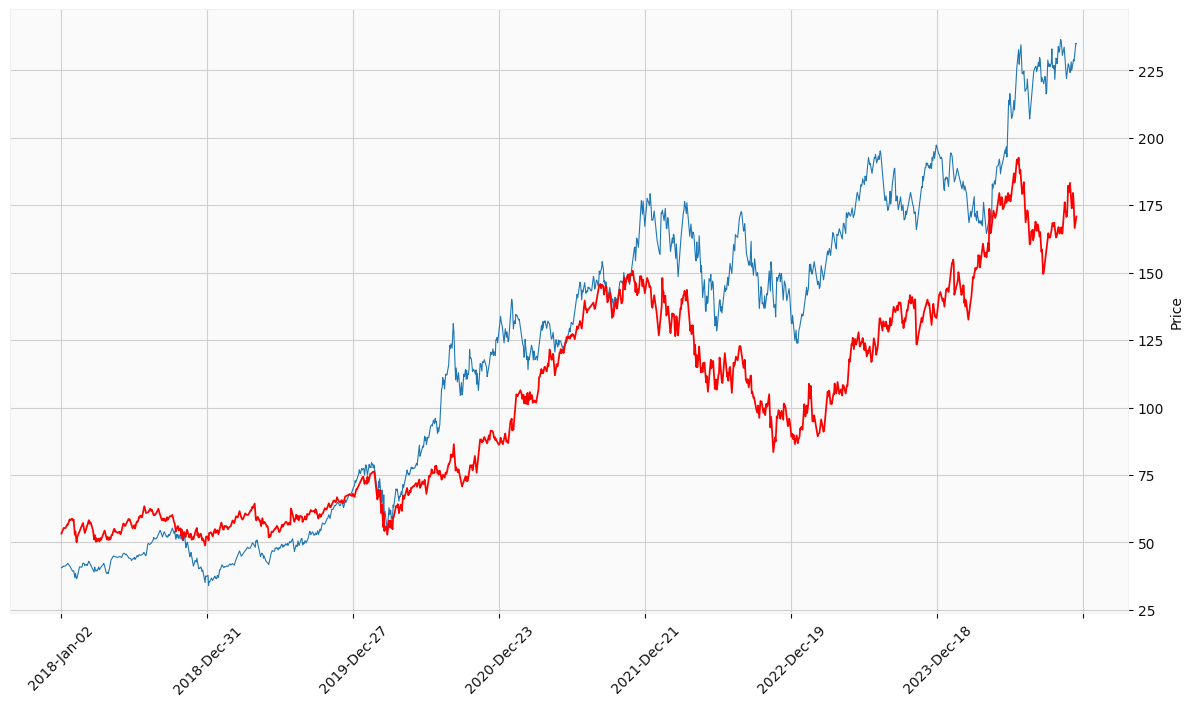

In [98]:
subfig = mpf.make_addplot(retGoog['Close'],color='red')
mpf.plot(retAapl,type='line',style='yahoo',addplot=subfig,figratio=(18,10),figscale=1.5)

In [97]:
res = sm.tsa.stattools.coint(retAapl['Close'], retGoog['Close'])
print(f' t_val {res[0]}\n p_val {res[1]}\n crit_val {res[2]}')

 t_val -2.528650502332291
 p_val 0.2665815844718512
 crit_val [-3.90275254 -3.33964785 -3.04689118]


- Apple和Google股价之间不存在协整关系

### EWA和EWC协整检验

In [103]:
retEWA = web.DataReader('EWA',start=datetime(2018,1,1),end=(datetime(2024,11,28)),data_source='stooq')
retEWA.sort_index(inplace=True)
retEWA.head()
retEWC = web.DataReader('EWC',start=datetime(2018,1,1),end=(datetime(2024,11,28)),data_source='stooq')
retEWC.sort_index(inplace=True)
retEWC.head()

,Open,High,Low,Close,Volume
Date,,,,,
2018-01-02,19.5392,19.6051,19.4926,19.5974,1.922135e+06
2018-01-03,19.6400,19.7283,19.6313,19.7234,1.853198e+06
2018-01-04,19.6895,19.7991,19.6730,19.7991,2.849430e+06
2018-01-05,19.8495,19.9377,19.8078,19.9154,1.897821e+06
2018-01-08,19.7991,19.8155,19.7574,19.8078,4.732095e+06


,Open,High,Low,Close,Volume
Date,,,,,
2018-01-02,27.1352,27.2216,26.9446,27.1898,2.756954e+06
2018-01-03,27.2265,27.3337,27.1809,27.2911,3.059620e+06
2018-01-04,27.4092,27.5253,27.3169,27.4807,1.697177e+06
2018-01-05,27.6623,27.8162,27.5720,27.5809,1.701690e+06
2018-01-08,27.5640,27.6157,27.4807,27.4896,2.748391e+06


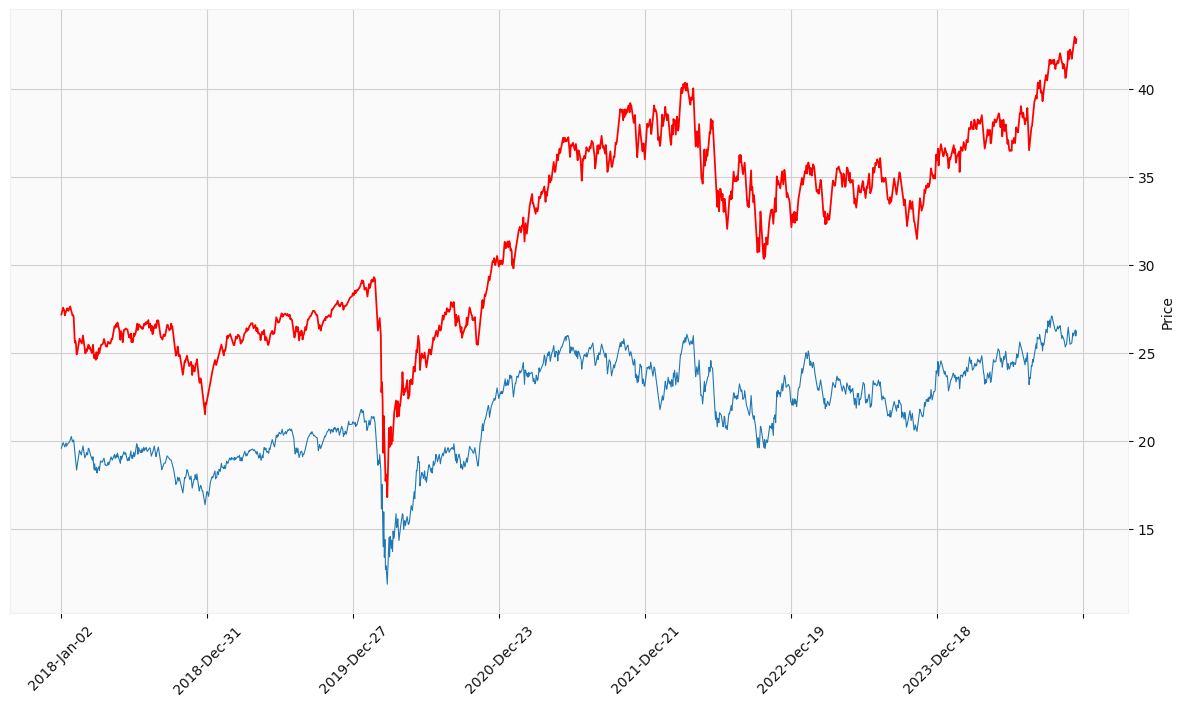

In [104]:
subfig = mpf.make_addplot(retEWC['Close'],color='red')
mpf.plot(retEWA,type='line',style='yahoo',addplot=subfig,figratio=(18,10),figscale=1.5)

In [105]:
res = sm.tsa.stattools.coint(retEWA['Close'], retEWC['Close'])
print(f' t_val {res[0]}\n p_val {res[1]}\n crit_val {res[2]}')

 t_val -3.3107473293016043
 p_val 0.053275857813328234
 crit_val [-3.90275254 -3.33964785 -3.04689118]


- EWA和EWC股票价格之间存在协整关系

#### 股票价格回归

In [106]:
# 增加常数项
X = sm.add_constant(retEWA['Close'])

In [108]:
regres = sm.OLS(retEWC['Close'],X).fit()
regres.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.896    
Dependent Variable: Close            AIC:                6893.5940
Date:               2024-11-28 22:01 BIC:                6904.5161
No. Observations:   1739             Log-Likelihood:     -3444.8  
Df Model:           1                F-statistic:        1.490e+04
Df Residuals:       1737             Prob (F-statistic): 0.00     
R-squared:          0.896            Scale:              3.0805   
--------------------------------------------------------------------
           Coef.    Std.Err.      t       P>|t|     [0.025    0.975]
--------------------------------------------------------------------
const     -9.1041     0.3365   -27.0521   0.0000   -9.7642   -8.4441
Close      1.8812     0.0154   122.0531   0.0000    1.8510    1.9115
------------------------------------------------------------------
Omnibus:               19.610       Durbin-Watson:          0.032 
Prob(Omnibus):         0.000        Jarque-Bera (JB):       12.988
Skew:                  0.059        Prob(JB):               0.002 
Kurtosis:              2.593        Condition No.:          175   
==================================================================

"""

const   -9.104119
Close    1.881220
dtype: float64

<AxesSubplot:xlabel='Date'>

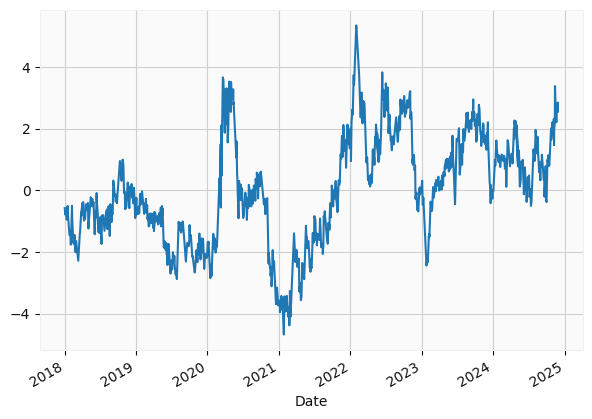

In [128]:
coef = regres.params
coef
regresid = pd.Series(regres.resid)
# 绘制残差图
regresid.plot(kind='line',figsize=(7,5))

#### 计算残差的布林线

In [122]:
residBands = ta.bbands(regresid,length=15,std=10,mamode='ema')
residBands

,BBL_15_10.0,BBM_15_10.0,BBU_15_10.0,BBB_15_10.0,BBP_15_10.0
Date,,,,,
2018-01-02,NaN,NaN,NaN,NaN,NaN
2018-01-03,NaN,NaN,NaN,NaN,NaN
2018-01-04,NaN,NaN,NaN,NaN,NaN
2018-01-05,NaN,NaN,NaN,NaN,NaN
2018-01-08,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2024-11-21,-2.913266,2.386226,7.685718,444.173506,0.527801
2024-11-22,-2.733237,2.407997,7.549231,427.013268,0.514821
2024-11-25,-2.629905,2.417047,7.463999,417.613076,0.506276


In [123]:
bbands_df = pd.DataFrame({'reside':regresid,'BU':residBands['BBU_15_10.0'],'BL':residBands['BBL_15_10.0'],'BM':residBands['BBM_15_10.0']})

<AxesSubplot:xlabel='Date'>

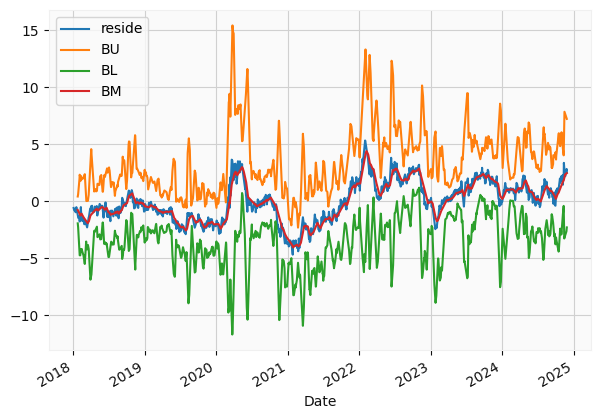

In [124]:
bbands_df.plot(kind='line',figsize=(7,5))

In [143]:
# alpha vantage获取日内数据
f = web.DataReader("AAPL", "av-intraday", start=datetime(2017, 2, 9),end=datetime(2024, 11, 28),api_key='018TZSGMV06VDR2N')
f

,open,high,low,close,volume
2024-10-29 04:00:00,232.6437,232.9134,232.1743,232.1743,3381
2024-10-29 04:01:00,232.4240,232.7936,232.1543,232.6637,3486
2024-10-29 04:02:00,232.6138,232.7237,232.2442,232.6637,361
2024-10-29 04:03:00,232.6238,232.6637,232.4340,232.6238,598
2024-10-29 04:04:00,232.6637,232.7037,232.3640,232.5139,747
...,...,...,...,...,...
2024-11-27 18:55:00,235.1500,235.1700,235.1212,235.1212,27
2024-11-27 18:56:00,235.1200,235.1500,235.1200,235.1500,96
2024-11-27 18:57:00,235.1350,235.1500,235.1200,235.1200,69
2024-11-27 18:58:00,235.1200,235.1500,235.1200,235.1200,934


### Long-Term Capital Management的教训

- 该对冲基金（hedge fund）成立于1994年，失败于1998年
- 前几年的年化收益率稳定在40%左右

- 创立者
    - John Meriwether
    - Myron S. Scholes，1997年经济学诺贝尔奖
    - Robert C. Merton，1997年经济学诺贝尔奖

- 套利策略
    - 债券套利
    - 事件套利，比如公司收购、合并
- 杠杆交易

## 多因子模型

<dl class="row">
    <dt class="col-md-4">多因子模型</dt>
    <dd class="col-md-8">利用<strong>多个</strong>对资产价格（例如，股票价格、期货价格等）走势有显著且有效的因子建立的量化模型，以解释和预测均衡资产价格</dd>
</dl>

- 将资产的回报率分解成能够解释的部分和不能被解释的部分

### CAPM模型

- 描述市场的系统风险与资产（主要指股票）期望回报率之间的关系

\begin{equation}
  E(r_i)=r_f+\beta_i\left(E(r_m)-r_f\right)
\end{equation}

- $\beta_i$：风险系数
- $E(r_i)$：第$i$个资产的期望收益率
- $r_f$：无风险收益
- $E(r_m)$：市场组合的期望收益率

$$
\beta_i = \frac{\text{Cov}(r_i,r_m)}{\sigma_m}
$$

$\beta$一般在$0\sim3$之间

晨星网（morningstar）会展示基金的Beta

[https://www.morningstar.com/funds/xnas/cdhix/risk](https://www.morningstar.com/funds/xnas/cdhix/risk)

<center><img src='./img/models/sml.png' width=100%></center>

- $\beta>0$，增大投资组合的风险，投资者需要更高的回报

- $\beta<0$，降低投资组合的风险，投资者会接受较低的回报

#### 为什么要用股票收益率？

In [116]:
bs.login()
rs = bs.query_history_k_data_plus("sh.600000",
    "date,open,high,low,close",
    start_date='2017-07-01', end_date='2021-10-27',
    frequency="d", adjustflag="3")
data_list = []
while (rs.error_code == '0') & rs.next():
    # 获取一条记录，将记录合并在一起
    data_list.append(rs.get_row_data())
result = pd.DataFrame(data_list, columns=rs.fields)
result

login success!


,date,open,high,low,close
0,2017-07-03,12.6400,12.6500,12.4700,12.5600
1,2017-07-04,12.5500,12.5800,12.4100,12.5500
2,2017-07-05,12.5000,12.6500,12.4700,12.6200
3,2017-07-06,12.6200,12.7200,12.5100,12.6600
4,2017-07-07,12.6200,12.6900,12.5500,12.6000
...,...,...,...,...,...
1046,2021-10-21,9.0500,9.0900,9.0100,9.0400
1047,2021-10-22,9.0700,9.1300,9.0200,9.0700
1048,2021-10-25,9.0300,9.0600,9.0200,9.0300
1049,2021-10-26,9.0600,9.0900,9.0100,9.0300


In [117]:
# 数据类型转换
result['date'] = pd.to_datetime(result['date'])
result.set_index('date',inplace=True)
for each in result.columns:
    result[each] = result[each].astype('float')
result

,open,high,low,close
date,,,,
2017-07-03,12.64,12.65,12.47,12.56
2017-07-04,12.55,12.58,12.41,12.55
2017-07-05,12.50,12.65,12.47,12.62
2017-07-06,12.62,12.72,12.51,12.66
2017-07-07,12.62,12.69,12.55,12.60
...,...,...,...,...
2021-10-21,9.05,9.09,9.01,9.04
2021-10-22,9.07,9.13,9.02,9.07
2021-10-25,9.03,9.06,9.02,9.03


In [119]:
#计算股票日收益率
result['ret'] = result['close'].pct_change()
result

,open,high,low,close,ret
date,,,,,
2017-07-03,12.64,12.65,12.47,12.56,NaN
2017-07-04,12.55,12.58,12.41,12.55,-0.000796
2017-07-05,12.50,12.65,12.47,12.62,0.005578
2017-07-06,12.62,12.72,12.51,12.66,0.003170
2017-07-07,12.62,12.69,12.55,12.60,-0.004739
...,...,...,...,...,...
2021-10-21,9.05,9.09,9.01,9.04,0.002217
2021-10-22,9.07,9.13,9.02,9.07,0.003319
2021-10-25,9.03,9.06,9.02,9.03,-0.004410


array([[<AxesSubplot:xlabel='date'>],
       [<AxesSubplot:xlabel='date'>]], dtype=object)

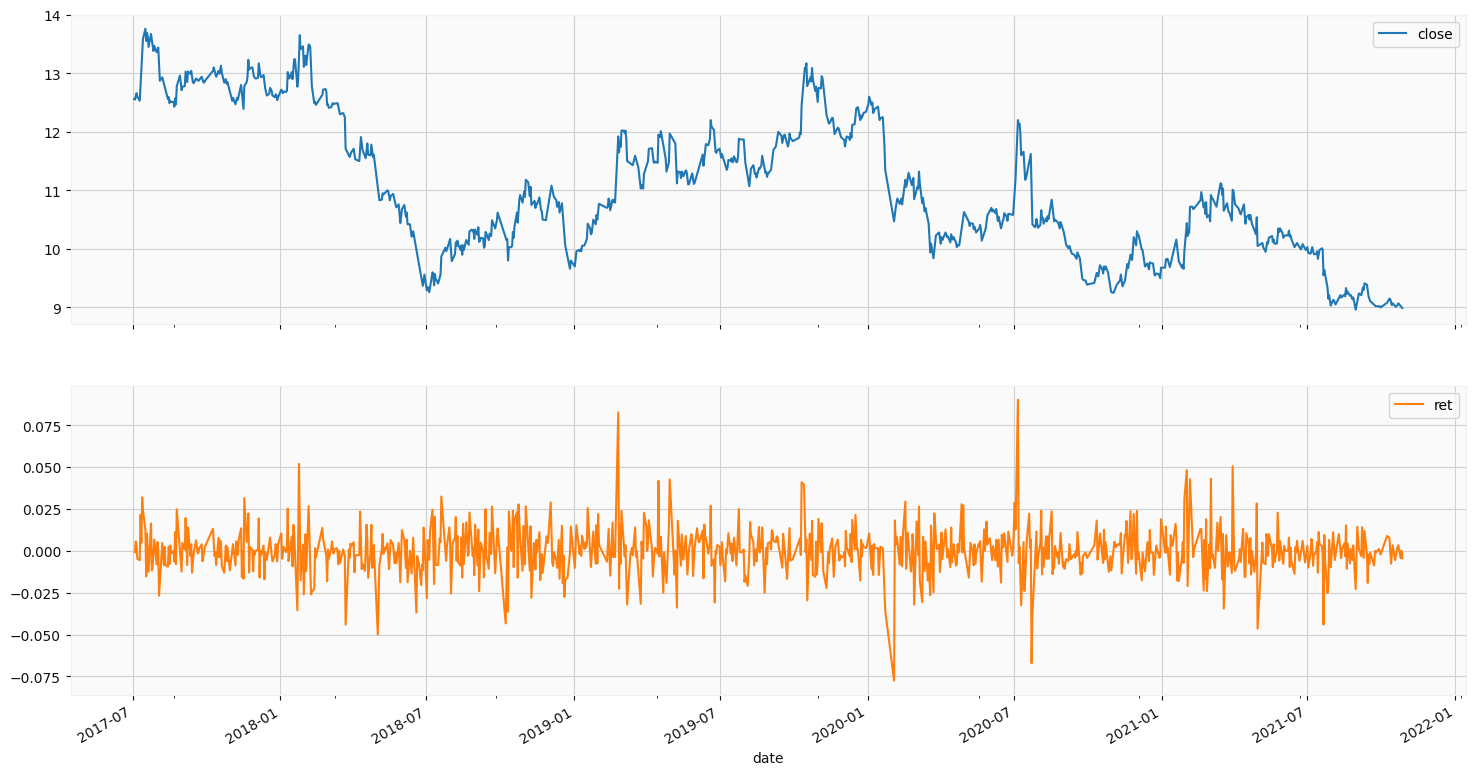

In [130]:
#绘制收盘价曲线
result.plot(y=['close','ret'],kind='line',figsize=(18,10),subplots=True,layout=(2,1))

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>]],
      dtype=object)

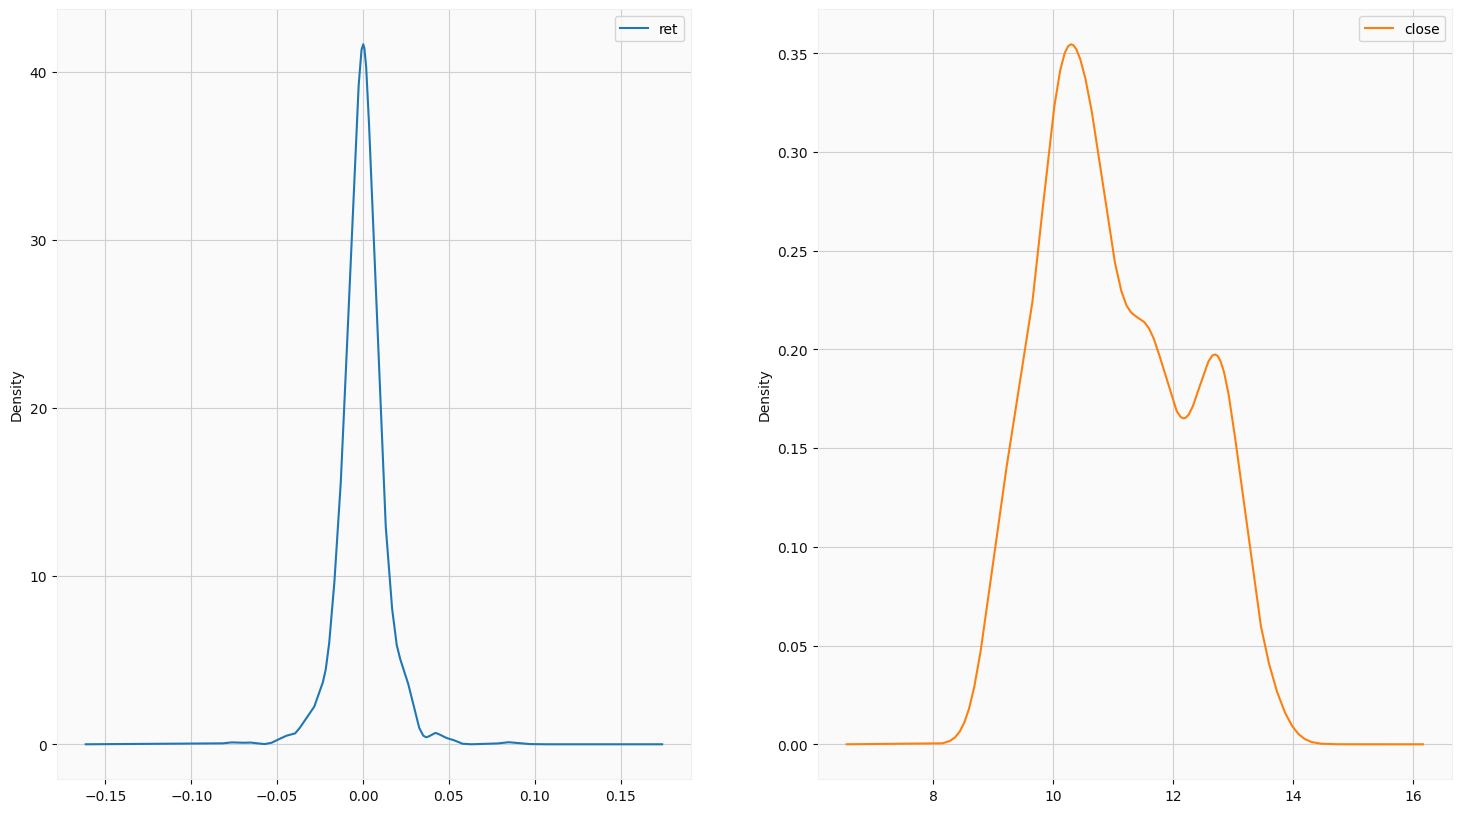

In [128]:
# 绘制收益率与收盘价的分布拟合曲线
result.plot(y=['ret','close'],kind='kde',figsize=(18,10),subplots=True,layout=(1,2),sharex=False)

- CAPM的假设
    1. 所有投资者都希望实现期望收益最大化
    2. 所有投资者在投资期内的预期收益服从**相同**的概率分布
    3. 所有投资者对风险都具有**相同**的偏好和估计
    4. 所有投资者都使用风险化收益模型进行投资
    5. 投资者都具有**风险相同的情况下偏好高收益**，**收益相同的情况下偏好低风险**的投资风格

> 假设过于严格，尤其2-5与实际情况不符

### APT模型

- APT(Arbitrage Pricing Theory)套利定价理论

\begin{equation}
  E[r_i^e]=\beta_{i1}\times RP_1+\beta_{i2}\times RP_2+\cdots+\beta_{in}\times RP_n
  \label{eq:apt}
\end{equation}

- $E(r_i^e)$：第$i$个资产的预期**超额收益率**
- $RP_j$：影响资产价格（收益率）的第$j$个公共因子
- $\beta_{ij}$：资产$i$对第$j$个公共因子的敏感度，或称为资产$i$对公共因子$RP_j$的风险暴露（factor exposure）

- 实际上，式\eqref{eq:apt}左右两侧并不等价，会存在定价误差（pricing error)

$$
E[r_i^e]=\alpha_i+\sum_{j=1}^n\beta_{ij}\times{RP_j}
$$

- 定价误差$\alpha$的来源
    1. 模型设定误差，即式\eqref{eq:apt}右侧遗漏重要因子
    1. 模型无误，但实际数据只是总体的一个样本，因此存在估计误差
        - 若$\alpha$并非显著不为0，则可认为$\alpha$是偶然出现
        - 若$\alpha$**显著不为0**，则市场对该资产存在错误定价，出现了套利机会。同时，该资产被称为一个**异象**（anomaly)

\begin{definition}\label{def:factor}
**因子**：描述了众多资产共同暴露的某种系统性风险，该风险是资产收益率背后的驱动力。因子收益率正是这种系统性风险的风险议价或风险补偿，是这些资产的共性收益率。
\end{definition}


- 相对于CAPM模型，APT模型
    - 不需要假设所有投资者对市场的预期一致
    - 没有假设市场是完全有效的，存在价格扭曲

- APT模型的局限
    - 不知道有多少个因子
    - 不知道哪些因子能够对资产价格（收益率）产生显著影响

### 多因子模型类型

- 宏观经济因子模型
    - 因子是可观测的经济和金融时间序列数据，例如通胀率、利率的变动作为对股票收益率的冲击

- 基本面因子模型
    - 因子由可观测的资产的特征构建而成

- 统计（机器学习）因子模型
    - 因子是不可观测的，从资产的回报率中提取而成

##### 基本面因子模型

\begin{equation}
    r_{it}=r_{ft}+\beta_{i1}\times RP_{1t}+\beta_{i2}\times RP_{2t}+\cdots+\beta_{in}\times RP_{nt}+\varepsilon_{it}
\end{equation}

- Fama-French方式
    - 构造$RP_{kt}$，计算$\beta_{ik}$

- Barra方式
    - 构造$\beta_{ik}$，计算$RP_{kt}$

### Fama-French三因子模型

\begin{problem}\label{prob:factorReturns}
如何计算因子收益率？
\end{problem}


\begin{definition}\label{def:factorPorf}
**因子模拟投资组合**（factor mimicking portfolio）：使用股票资产围绕某目标因子构建的投资组合。该投资组合须满足下述两个条件：
\begin{enumerate}
\item 该投资组合仅在目标因子上有大于0的风险暴露，在其他因子上的风险暴露为0；
\item 在所有满足上述条件的组合中，该投资组合的特质性风险（idiosyncratic risk）最小。
\end{enumerate}

\end{definition}


\begin{example}\label{example:factorPortConstruct}
构建因子投资模拟组合，考虑两个因子：因子A和因子B
\end{example}


|股票|因子A风险暴露|因子B风险暴露|特质性风险|
|---|---|---|---|
|股票1|0.8|0.4|1%|
|股票2|1.3|0.6|2%|
|股票3|0.6|-0.4|5%|
|股票4|1.2|-0.4|1%|

- 应当选择股票1和股票4，同时满足条件1和条件2

\begin{problem}\label{prob:factorExposurePort}
构建投资模拟组合需要知道股票在因子上的风险暴露，但计算风险暴露又须知道因子收益率，如何解决这个矛盾？
\end{problem}


\begin{definition}\label{def:sorting}
**排序法**：使用个股在某个指标上的取值大小，代替个股在围绕该指标构建的因子上风险暴露的高低。
\end{definition}


\begin{equation}
  E(r_i)=r_f+\beta_1\left(r_m-r_f\right)+\beta_2 SMB+\beta_3HML
\end{equation}

#### $SMB$

- Small Minus Big，市值因子

- 小市值（market captilization）公司的股票回报会超过大市值公司的股票回报

$$
    SMB = 小市值公司股票组合的收益率-大市值公司股票组合的收益率
$$

#### $HML$

- High Minus Low，账面市值比

$$
账面市值比（\text{book to market ratio}）=\frac{公司股东权益}{公司市值}
$$

- 高账面市值比（价值股）公司的股票回报会超过低账面市值比（成长股）公司的股票回报

$$
    HML= 高账面市值比公司股票组合的收益率-低账面市值比公司股票组合的收益率
$$

\begin{problem}\label{prob:doubleSort}
对个股在HML指标上的取值单独排序可以吗？
\end{problem}


- 假设HML大的股票同时也是大市值股票，HML小的股票同时也是小市值股票

- 构建的投资组合收益率不仅受到HML影响，同时还会受到市值影响

\begin{definition}\label{def:doubleSort}
**双重排序**（double sorting）：按照两个指标排序并构建因子模拟投资组合。
\end{definition}


|""|High(高账面市值比)|Middle(中间)|低(Low)|
|---|---|---|---|
|Small(小市值)|SH|SM|SL|
|Big(大市值)|BH|BM|BL|

$$
SMB=\frac{1}{3}(SH+SM+SL)-\frac{1}{3}(BH+BM+BL)
$$

$$
HML=\frac{1}{2}(SH+BH)-\frac{1}{2}(SL+BL)
$$

### Fama-French五因子模型

\begin{equation}
  E(r_i)=r_f+\beta_1\left(r_m-r_f\right)+\beta_2SMB+\beta_3HML+\beta_4RMW+\beta_5CMA
\end{equation}

#### RMW

- Robust minus weak，盈利水平因子

$$
RMW=高盈利水平公司股票组合的收益-低盈利水平公司股票组合的收益
$$

#### CMA

- Conservative minus aggressive，投资水平因子

$$
CMA=保守投资水平公司股票组合的收益-激进投资水平公司股票组合的收益
$$

### 三因子模型计算

##### 因子数据来源

- Fama-French：[http://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html](http://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html)
- 国内：[https://www.factorwar.com/data/factor-models/](https://www.factorwar.com/data/factor-models/)

##### 读入三因子数据

In [13]:
threeFct = pd.read_csv('./data/models/RESSET_ThreeFactors_DAILY.csv',index_col=2,parse_dates=[2])
threeFct

,Exchflg,Mktflg,Rmrf,Smb,Hml
Date,,,,,
1992-07-01,0,A,-0.0337,-0.0123,0.0373
1992-07-02,0,A,-0.0015,0.0109,0.0054
1992-07-03,0,A,0.0180,0.0034,-0.0142
1992-07-06,0,A,0.0008,-0.1811,-0.1275
1992-07-07,0,A,0.0071,-0.0043,-0.0468
...,...,...,...,...,...
2020-09-24,0,A,-0.0203,-0.0075,0.0020
2020-09-25,0,A,-0.0013,-0.0033,-0.0024
2020-09-28,0,A,-0.0031,-0.0141,0.0028


变量名|含义
---|---
Exchflg|交易所标识
Mktflg|股票市场标识
Date|日期
Rmrf|市场溢酬因子
Smb|市值因子
Hml|账面市值比因子

##### 读入个股股价数据

In [14]:
bs.login()

login success!


In [15]:
res = bs.query_history_k_data_plus(code='sh.600000',fields='date,open,high,low,close',start_date='1992-7-1',end_date='2020-9-30',frequency='d',adjustflag='1')

In [16]:
dataLst = []
while res.error_code == '0' and res.next():
    dataLst.append(res.get_row_data())
stock1 = pd.DataFrame(dataLst,columns=res.fields)
stock1

,date,open,high,low,close
0,1999-11-10,29.5000000000,29.8000000000,27.0000000000,27.7500000000
1,1999-11-11,27.5800000000,28.3800000000,27.5300000000,27.7100000000
2,1999-11-12,27.8600000000,28.3000000000,27.7700000000,28.0500000000
3,1999-11-15,28.2000000000,28.2500000000,27.7000000000,27.7500000000
4,1999-11-16,27.8800000000,27.9700000000,26.4800000000,26.5500000000
...,...,...,...,...,...
5060,2020-09-24,99.0995981300,99.2027194600,97.5527781800,97.9652635000
5061,2020-09-25,97.9652635000,98.2746274900,97.5527781800,97.6558995100
5062,2020-09-28,97.8621421700,98.2746274900,97.5527781800,97.5527781800
5063,2020-09-29,97.9652635000,98.1715061600,97.2434141900,97.2434141900


In [17]:
stock1.dtypes

date     object
open     object
high     object
low      object
close    object
dtype: object

In [18]:
stock1['date'] = pd.to_datetime(stock1['date'])  # 设置时间为index
stock1.set_index('date',inplace=True)
stock1

,open,high,low,close
date,,,,
1999-11-10,29.5000000000,29.8000000000,27.0000000000,27.7500000000
1999-11-11,27.5800000000,28.3800000000,27.5300000000,27.7100000000
1999-11-12,27.8600000000,28.3000000000,27.7700000000,28.0500000000
1999-11-15,28.2000000000,28.2500000000,27.7000000000,27.7500000000
1999-11-16,27.8800000000,27.9700000000,26.4800000000,26.5500000000
...,...,...,...,...
2020-09-24,99.0995981300,99.2027194600,97.5527781800,97.9652635000
2020-09-25,97.9652635000,98.2746274900,97.5527781800,97.6558995100
2020-09-28,97.8621421700,98.2746274900,97.5527781800,97.5527781800


In [19]:
for each in stock1.columns:
    stock1[each] = stock1[each].astype('float') #转换数据类型
stock1.dtypes

open     float64
high     float64
low      float64
close    float64
dtype: object

##### 将股价数据和三因子数据合并

In [23]:
stk1 = pd.concat([stock1,threeFct],axis=1,join='inner')
stk1

,open,high,low,close,Exchflg,Mktflg,Rmrf,Smb,Hml
1999-11-10,29.500000,29.800000,27.000000,27.750000,0,A,-0.0101,0.0005,-0.0011
1999-11-11,27.580000,28.380000,27.530000,27.710000,0,A,-0.0045,-0.0011,-0.0023
1999-11-12,27.860000,28.300000,27.770000,28.050000,0,A,0.0028,0.0043,0.0023
1999-11-15,28.200000,28.250000,27.700000,27.750000,0,A,-0.0004,0.0075,0.0027
1999-11-16,27.880000,27.970000,26.480000,26.550000,0,A,-0.0129,0.0048,0.0037
...,...,...,...,...,...,...,...,...,...
2020-09-24,99.099598,99.202719,97.552778,97.965264,0,A,-0.0203,-0.0075,0.0020
2020-09-25,97.965264,98.274627,97.552778,97.655900,0,A,-0.0013,-0.0033,-0.0024
2020-09-28,97.862142,98.274627,97.552778,97.552778,0,A,-0.0031,-0.0141,0.0028
2020-09-29,97.965264,98.171506,97.243414,97.243414,0,A,0.0045,0.0013,-0.0063


##### 计算每日收益率

In [24]:
stk1['ret'] = stk1['close'].pct_change()
stk1

,open,high,low,close,Exchflg,Mktflg,Rmrf,Smb,Hml,ret
1999-11-10,29.500000,29.800000,27.000000,27.750000,0,A,-0.0101,0.0005,-0.0011,NaN
1999-11-11,27.580000,28.380000,27.530000,27.710000,0,A,-0.0045,-0.0011,-0.0023,-0.001441
1999-11-12,27.860000,28.300000,27.770000,28.050000,0,A,0.0028,0.0043,0.0023,0.012270
1999-11-15,28.200000,28.250000,27.700000,27.750000,0,A,-0.0004,0.0075,0.0027,-0.010695
1999-11-16,27.880000,27.970000,26.480000,26.550000,0,A,-0.0129,0.0048,0.0037,-0.043243
...,...,...,...,...,...,...,...,...,...,...
2020-09-24,99.099598,99.202719,97.552778,97.965264,0,A,-0.0203,-0.0075,0.0020,-0.013499
2020-09-25,97.965264,98.274627,97.552778,97.655900,0,A,-0.0013,-0.0033,-0.0024,-0.003158
2020-09-28,97.862142,98.274627,97.552778,97.552778,0,A,-0.0031,-0.0141,0.0028,-0.001056
2020-09-29,97.965264,98.171506,97.243414,97.243414,0,A,0.0045,0.0013,-0.0063,-0.003171


##### 股票每日收益率对三因子回归

###### $r_f$选用10年期国债收益率

In [25]:
bondRate = pd.read_csv('./data/models/10YearBond.csv',index_col=0,parse_dates=[0])
bondRate

,中国国债收益率10年
日期,
1990-12-19,NaN
1990-12-20,NaN
1990-12-21,NaN
1990-12-24,NaN
1990-12-26,NaN
...,...
2021-11-15,2.9269
2021-11-16,2.9244
2021-11-17,2.9295


In [26]:
bondRate.columns=['bondRate']

###### 合并三因子、收益率、债券收益数据

In [27]:
stk2 = pd.concat([stk1,bondRate],axis=1,join='inner')
stk2

,open,high,low,close,Exchflg,Mktflg,Rmrf,Smb,Hml,ret,bondRate
1999-11-10,29.500000,29.800000,27.000000,27.750000,0,A,-0.0101,0.0005,-0.0011,NaN,NaN
1999-11-12,27.860000,28.300000,27.770000,28.050000,0,A,0.0028,0.0043,0.0023,0.012270,NaN
1999-11-15,28.200000,28.250000,27.700000,27.750000,0,A,-0.0004,0.0075,0.0027,-0.010695,NaN
1999-11-16,27.880000,27.970000,26.480000,26.550000,0,A,-0.0129,0.0048,0.0037,-0.043243,NaN
1999-11-17,26.500000,27.180000,26.370000,27.180000,0,A,0.0197,0.0030,0.0055,0.023729,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2020-09-24,99.099598,99.202719,97.552778,97.965264,0,A,-0.0203,-0.0075,0.0020,-0.013499,3.0840
2020-09-25,97.965264,98.274627,97.552778,97.655900,0,A,-0.0013,-0.0033,-0.0024,-0.003158,3.1295
2020-09-28,97.862142,98.274627,97.552778,97.552778,0,A,-0.0031,-0.0141,0.0028,-0.001056,3.1092
2020-09-29,97.965264,98.171506,97.243414,97.243414,0,A,0.0045,0.0013,-0.0063,-0.003171,3.1292


In [28]:
stk2.dropna(how='any',inplace=True)
stk2

,open,high,low,close,Exchflg,Mktflg,Rmrf,Smb,Hml,ret,bondRate
2002-01-04,15.701431,15.701431,15.379351,15.459871,0,A,-0.0194,-0.0020,-0.0029,-0.021033,3.2096
2002-01-07,15.399481,15.399481,15.027075,15.097530,0,A,-0.0118,-0.0008,-0.0010,-0.023437,3.2003
2002-01-08,15.097530,15.369286,15.057270,15.097530,0,A,-0.0078,-0.0019,-0.0002,0.000000,3.5225
2002-01-09,15.147855,15.268635,15.057270,15.097530,0,A,-0.0172,-0.0070,0.0002,0.000000,3.5896
2002-01-10,15.097530,15.238440,14.704994,15.127725,0,A,0.0086,0.0031,0.0067,0.002000,3.5784
...,...,...,...,...,...,...,...,...,...,...,...
2020-09-24,99.099598,99.202719,97.552778,97.965264,0,A,-0.0203,-0.0075,0.0020,-0.013499,3.0840
2020-09-25,97.965264,98.274627,97.552778,97.655900,0,A,-0.0013,-0.0033,-0.0024,-0.003158,3.1295
2020-09-28,97.862142,98.274627,97.552778,97.552778,0,A,-0.0031,-0.0141,0.0028,-0.001056,3.1092
2020-09-29,97.965264,98.171506,97.243414,97.243414,0,A,0.0045,0.0013,-0.0063,-0.003171,3.1292


###### 构建回归模型

In [29]:
stk2Fct = sm.add_constant(stk2[['Rmrf','Smb','Hml']])
stk2RegModel = sm.OLS(stk2['ret']-stk2['bondRate']/100,stk2Fct)
stk2RegRes = stk2RegModel.fit()
stk2RegRes.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
====================================================================
Model:              OLS              Adj. R-squared:     0.469      
Dependent Variable: y                AIC:                -24187.2942
Date:               2022-11-25 06:58 BIC:                -24161.6097
No. Observations:   4542             Log-Likelihood:     12098.     
Df Model:           3                F-statistic:        1338.      
Df Residuals:       4538             Prob (F-statistic): 0.00       
R-squared:          0.469            Scale:              0.00028472 
----------------------------------------------------------------------
            Coef.    Std.Err.       t       P>|t|     [0.025    0.975]
----------------------------------------------------------------------
const      -0.0348     0.0003   -139.0323   0.0000   -0.0353   -0.0343
Rmrf        0.9165     0.0150     61.0252   0.0000    0.8871    0.9460
Smb        -0.7298     0.0389    -18.7384   0.0000   -0.8062   -0.6534
Hml         0.3552     0.0494      7.1935   0.0000    0.2584    0.4520
--------------------------------------------------------------------
Omnibus:              522.041       Durbin-Watson:          1.704   
Prob(Omnibus):        0.000         Jarque-Bera (JB):       2912.568
Skew:                 0.405         Prob(JB):               0.000   
Kurtosis:             6.839         Condition No.:          214     
====================================================================

"""

<AxesSubplot:>

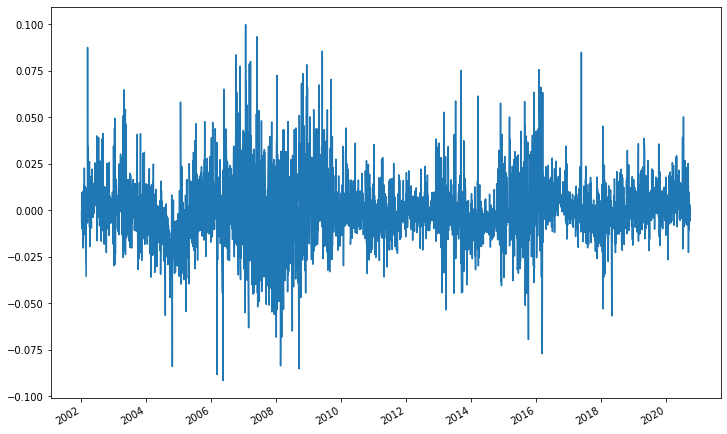

In [30]:
# 残差曲线
stk2RegRes.resid.plot(kind='line',figsize=(12,8))

- `Rmrf`、`Smb`、`Hml`的**系数**称为`sh.600000`股票在三个因子上的**风险暴露**
- 截距称为`sh.600000`股票的$\alpha$值

### 因子模型策略设计

#### 候选因子与因子的分类

- 候选因子越全面越好

#### 股票交易相关因子

##### 价值因子

- 对应价值型投资，买入便宜的资产长期持有以获得超额收益

- 典型指标
    - 盈利收益率，$E/P$
    - 市净率

##### 成长因子

- 对应成长型投资，依据资产的历史增长水平对未来预测

- 典型指标
    - 净资产收益率（ROE）
    - 总资产收益率（ROA）
    - 主营收入增长率
    - 市盈率相对盈利增长比例，$PEG=\frac{PE}{年盈利增长率}$

##### 品质因子

- 持有高品质的资产，风险较低，较好保护投资者利益

- 典型指标
    - 资产负债率
    - 固定资产比例

##### 分析师因子

- 预测当年净利润增长率、主营业务收入增长率、最近一个月预测净利润上调幅度、最近一个月越策主营业务收入上调幅度，最近一个月上调评级占比

#### 期货交易相关因子

<center><img src="./img/models/futureMultiFactors.png" width=100%></center>

- 近月收益：近月合约价格对数的增量，衡量捕捉当前价格波动的收益
- 持有收益：远月合约价格对数的增量，衡量捕捉长期持有的收益

##### 动量因子（momentum factor）

- 原理：过去上涨良好的商品未来还会上涨；过去下跌的商品未来还会下跌

- 因子构成
    - 商品的超额收益在过去12个月内的均值

##### 期限结构因子（term structure）

- 原理：存储理论（the theory of storage），该理论将期限结构与库存水平以及持有实物商品的的成本与收益联系起来

- 持有稀缺的商品，卖出供应充足的商品

- 因子构成
    $$ln(f_{t,Front})-ln(f_{t,Second})$$
    
    - 其中，$ln(f_{t,Front})为准备建立仓位时候的近月合约价格$

##### 波动率因子（volatility factor）

- 原理：价格波动性高的商品对外来的冲击更为敏感，但同时，也对跨期风险的承受能力弱，因此，持有这类商品的投资者会要求一个更高的回报

- 因子构成：变异系数
\begin{align}
  &\frac{\sigma^2}{|\mu|}\\
  &\sigma^2=\frac{1}{D-1}\sum_{d=1}^D(r_{d,Front}-\mu)^2\\
  &\mu = \frac{1}{D}\sum_{d=1}^Dr_{d,Front}
\end{align}

##### 价值因子（value factor）

- 原理：投资者的有限理性偏差导致价格出现异动，但是之后价格会向平均水平回归

- 长期盈利的商品在未来价格会下跌；长期低迷的商品在未来价格会上涨

- 因子构成

\begin{equation}
  ln\frac{\frac{1}{D}\sum_{d=1}^D f_{d,Front}}{f_{t,Front}}
\end{equation}

##### 流动性因子（liquidity factor）

- 原理：持有流动性低的商品的投资者要求一个更高的期望回报

- 因子构成
\begin{equation}
  LR=\frac{1}{D}\sum_{d=1}^D\frac{Volume_d}{|r_d|}
\end{equation}

##### 汇率因子

- 原理：美元币值与商品价格呈现负相关关系

- 因子构成
    - $期货的月收益=\beta\times 美元对主要货币的汇率变动+\varepsilon$

- 对于美元$\beta$系数更小的商品，投资者会要求一个更高的回报

##### 通胀因子

- 原理：商品是对通胀的对冲

- 因子构成
    - $期货的月收益=\beta\times 通胀率的变动+\varepsilon$

- 对于通胀$\beta$系数更大的商品，投资者会要求一个更高的回报

##### 更多因子

[101 Formulaic Alphas](https://arxiv.org/vc/arxiv/papers/1601/1601.00991v1.pdf)

#### 有效因子识别

- 能够将公司股票收益率高低明显区别出来的因子

- 方法：两阶段回归方法，假设有$n$个股票、$T$个周期、$k$个因子 

1. 对于每个股票在时间序列上进行回归
$$
    r_{it}=a_i+\beta_{i1}RP_1+\beta_{i2}RP_2+\cdots+\beta_{ik}RP_k+\varepsilon_{it}, t= 1,2,\cdots,T, i=1,2,\cdots,n
$$
    - $\beta_{ik}$：股票$i$在因子$RP_k$上的风险暴露

2. 截面回归
$$
    E[r_{it}]=\alpha_i+\lambda_1\beta_{i1}+\lambda_2\beta_{i2}+\cdots+\lambda_k\beta_{ik}, i=1,2,\cdots,n
$$
    - $E[r_{it}]$：股票$i$的收益率在$T$周期内的均值
    - $\lambda_k$：因子$RP_k$对个股收益率的影响作用
    - 根据$\lambda_k$大小确定因子

#### Smart beta策略

##### 计算因子得分

- 针对每个筛选出来的因子，将所有股票在该因子上的风险暴露按照从大到小排序打分
- 对每个因子设置一个权重
- 计算每个股票在所有筛选出来的因子上得分的加权和，即每个股票的因子得分

##### 选股

- 设定一个调整股票池的时间频率
- 计算过去$T$个周期内，各个股票在因子上的风险暴露，加权得到因子得分
- 将因子得分按照从大到小排序，选出前$m$个股票进入股票池，原先股票池中的股票因子得分较低的，剔出股票池

#### 残差动量策略

- 对每支股票在历史一段时间内（比如过去的252天）做Famma-French回归
$$ R_{i,t} = \alpha_i + \beta_{MKT} MKT_t + \beta_{SMB} SMB_t + \beta_{HML} HML_t + \epsilon_t $$
- 计算每支股票在每个时间点上的残差（不能由因子模型解释的部分）
- 计算这些残差的动量（信息比率，information ratio, IR）
$$ \text{Score} = \frac{\hat{\alpha}_i}{\text{StdDev}(\epsilon_t)} $$
- 买高残差动量的股票

#### 均值回归策略

##### 因子层面的回归

- 预期因子本身会向其均值回归
    - 例如价值股已经跌了很长时间，价值股和成长股之间的差距已经达到历史高点，期待HML因子会回归
    - 做多HML（做多价值股，做空成长股）

- 个股特异收益率的回归

- 用Famma-French模型计算个股的期望收益率
$$ \text{Expected_return}_i = \beta_{MKT,i} R_{MKT} + \beta_{SMB,i} R_{SMB} + \beta_{HML,i} R_{HML} $$
- 计算残差

$$ \text{Residual}_i = \text{Actual_return}_i - \text{Expected_return}_i $$

- 若$\text{Residual}_i<0$（$p<0.05$），做多这支股票；若$\text{Residual}_i>0$（$p<0.05$），做空这支股票

# Barra 风险因子模型与因子挖掘

## Barra 背景简介

### 历史起源
*   **创始人**: 由加州大学伯克利分校金融学教授 **Barr Rosenberg** 于 **1975年** 创立。
*   **名称由来**: BARRA 是 **Barr Rosenberg Associates** 的缩写。
*   **所属机构**: 2004年被 **MSCI** 收购，现称为 MSCI Barra，是全球金融风险模型的标杆。

### 核心贡献
在 Barra 出现之前，华尔街主要依赖 CAPM (单因子模型) 来衡量风险。Barr Rosenberg 的革命性贡献在于提出了 **多因子风险模型 (Multi-Factor Risk Model)**：
1.  **风险并非单一**: 股票的波动不仅仅来自于市场 (Market)，还来自于行业 (Industry)、风格 (Style) 如规模、价值、动量等。
2.  **结构化分解**: 任何股票的收益都可以拆解为“共性部分” (由因子解释) 和“个性部分” (特质收益)。

## 核心概念：Fama-French vs. Barra

量化金融中最核心的两种归因流派：

| 特性 | Fama-French (时间序列) | Barra (截面回归) |
| :--- | :--- | :--- |
| **核心逻辑** | **看过去**：一支股票过去随因子波动了多少？ | **看现在**：基于当前特征，市场奖励了多少？ |
| **已知量 (Input)** | **因子收益** ($f_t$) <br> (例如：做多小盘做空大盘的组合收益) | **Beta / 暴露** ($\beta_i$) <br> (例如：市值的 Z-Score) |
| **未知量 (Output)** | **Beta** (敏感度) | **因子收益** (特征的回报率) |
| **回归维度** | **一支股票**，多天的数据 | **多支股票**，一天的数据 |
| **更新频率** | Beta 更新慢，需要历史数据 | Beta 实时更新 (特征变了 Beta 就变) |

## 构建Barra因子
### 第一步：计算 Barra Beta (因子暴露)

Barra 模型**不通过回归**来计算 Beta，而是直接计算**标准化的特征**。

### 计算方法：Z-Score 标准化
对于截面上的每一只股票 $i$：
$$
\text{Exposure}_{i} = \frac{\text{Value}_i - \mu}{\sigma}
$$

*   **Value**: 原始因子值 (如 Log 市值)
*   **$\mu$**: 当天所有股票该因子的均值
*   **$\sigma$**: 当天所有股票该因子的标准差

**直观理解**：
*   如果 Apple 的市值为 3 万亿，Z-Score = +3.0，那么它的 **Size Beta 就是 3.0**。
*   如果某小盘股 Z-Score = -1.5，它的 **Size Beta 就是 -1.5**。

**结论**：在 Barra 中，特征本身就是 Beta。

### 第二步：计算因子收益 (截面回归)

当我们知道了所有股票的 Beta 后，我们要问：**今天市场为每一个单位的 Beta 支付了多少回报？**

### 回归方程 (针对某一天 $t$)
$$
R_{i} = f_{\text{size}} \cdot \beta_{i, \text{size}} + f_{\text{value}} \cdot \beta_{i, \text{value}} + \dots + \epsilon_i
$$

*   **$R_i$ (已知)**: 股票 $i$ 当天的实际收益率。
*   **$\beta_{i}$ (已知)**: 我们上一步计算出的 Z-Score。
*   **$f$ (待求)**: 因子收益率 (回归系数)。

### 求解意义

如果解出 $f_{\text{size}} = 0.5\%$，意味着：**今天，市值每增加一个标准差，股票收益率平均增加 0.5%。**

## Barra 模型的线性代数表达

为了深入理解 Barra 模型，我们需要使用线性代数语言来描述其核心机制，特别是如何处理**异方差性**和**协方差矩阵分解**。

### 多因子模型的矩阵形式
对于某一特定时间点 $t$，假设有 $N$ 只股票和 $K$ 个因子：
$$
\mathbf{r}_t = \mathbf{X}_t \mathbf{f}_t + \mathbf{u}_t
$$

*   $\mathbf{r}_t$: $N \times 1$ 的超额收益率向量。
*   $\mathbf{X}_t$: $N \times K$ 的因子暴露矩阵 (Loading Matrix)，即我们计算的 Z-Scores。
*   $\mathbf{f}_t$: $K \times 1$ 的因子收益向量 (待估计)。
*   $\mathbf{u}_t$: $N \times 1$ 的特质收益向量 (Specific Returns)。

$N$支股票收益率的协方差矩阵为：
$$
\mathbf{\Sigma}_t = \text{Var}(\mathbf{X}_t\mathbf{f}_t)+\text{Var}(\mathbf{u}_t)
$$

### 因子收益的估算：加权最小二乘法 (WLS)
在截面回归中，我们不能使用普通的 OLS，因为不同股票的特质波动率 (Specific Risk) 差异巨大 (小盘股波动远大于大盘股)。为了提高估计效率，Barra 使用 **WLS**。

目标函数：
$$
\min_{\mathbf{f}_t} \sum_{i=1}^{N} w_i (r_{i,t} - \mathbf{x}_{i,t}^T \mathbf{f}_t)^2
$$

解析解：
$$
\mathbf{f}_t = (\mathbf{X}_t^T \mathbf{W}_t \mathbf{X}_t)^{-1} \mathbf{X}_t^T \mathbf{W}_t \mathbf{r}_t
$$

*   $\mathbf{W}_t$: $N \times N$ 的对角权重矩阵。通常取 $w_{ii} = 1 / \sigma_{i, \text{specific}}^2$ (特质方差的倒数)。这意味着**波动率小的股票在回归中拥有更大的话语权**。

### 结构化协方差矩阵
给定一个投资组合含有$N$支股票，股票持仓权重向量为$\mathbf{h}$，收益率向量为$\mathbf{r}$，该组合的收益率$r_p=\mathbf{h}^T\mathbf{r}$，则该组合的风险$\sigma_P^2$可以表示为：

$$
\sigma_P^2=E\left[(r_p-E(r_p))^2\right]
$$

进一步将$r_p$替换为向量形式，则

$$
\sigma_P^2=E\left[(\mathbf{h}^T\mathbf{r}-E(\mathbf{h}^T\mathbf{r}))^2\right]=\mathbf{h}^T \mathbf{\Sigma} \mathbf{h}
$$

量化的目标是预测未来的组合风险 $\sigma_P^2$。

直接估算 $N \times N$ 的协方差矩阵 $\mathbf{\Sigma}$ 是不可行的 (因为 $N \approx 3000$，需要估算 $4.5 \times 10^6$ 个参数)。

Barra 将 $\mathbf{\Sigma}$ 分解为低维结构：
$$
\mathbf{\Sigma} = \mathbf{X} \mathbf{F} \mathbf{X}^T + \mathbf{\Delta}
$$

*   $\mathbf{F}$: $K \times K$ 的**因子协方差矩阵** (Factor Covariance Matrix)。通常 $K \approx 50$，容易估算。
*   $\mathbf{\Delta}$: $N \times N$ 的**特质风险对角矩阵** (Specific Risk Matrix)。假设不同股票的特质收益互不相关 (对角阵假设)。

### 组合风险分解
基于上述公式，任意投资组合的风险可以被分解为：
$$
\sigma_P^2 = \underbrace{\mathbf{h}^T \mathbf{X} \mathbf{F} \mathbf{X}^T \mathbf{h}}_{\text{Common Factor Risk}} + \underbrace{\mathbf{h}^T \mathbf{\Delta} \mathbf{h}}_{\text{Specific Risk}}
$$

**可以通过分散投资消除特质风险 (Specific Risk)，但无法消除共同因子风险 (Common Factor Risk)，除非对冲掉因子暴露 (即让 $\mathbf{X}^T \mathbf{h} = 0$)。**

### 纯 Alpha 交易 (Pure Alpha / Stat Arb)
*   **原理**：利用 Barra 模型剥离所有共同因子风险，只交易特质收益 (Specific Return / Residual)。
*   **公式**：$\epsilon_i = R_{\text{Realized}} - \sum_{k} \beta_{ik} f_k$
*   **场景**：某股票突然大涨 5%，但大盘和行业板块均未动，且无公司特有新闻。Barra 预期收益为 0%，则这 5% 为“无法解释的上涨”，可能源于非理性的资金流动。
*   **操作步骤**：
    1.  **计算残差**: 每日计算全市场股票的残差 $\epsilon_i$。
    2.  **生成信号**: 寻找残差 Z-Score 极值 (如 > 2.0 或 < -2.0) 的股票。高残差意味着短期超买 (Overbought)，低残差意味着短期超卖 (Oversold)。
    3.  **构建组合**: **做多**低残差股票，**做空**高残差股票 (均值回归策略)。
    4.  **风控优化**: 使用优化器确保组合对 Market, Sector, Size 等所有风格因子的暴露度为 0 (Neutral)。
    5.  **获利来源**: 赚取特质价格冲击回归均值的钱 (Reversal of Idiosyncratic Shocks)。

### 因子择时 (Factor Timing)
*   **原理**：基于宏观环境或市场情绪，预测因子收益向量 $f$ 的未来走势，主动暴露于强势因子。
*   **场景**：宏观经济复苏初期，小盘股 (Small Cap) 通常跑赢大盘；高通胀时期，价值股 (Value) 通常跑赢成长股。
*   **操作步骤**：
    1.  **宏观判断**: 预测未来市场风格（如：风格从成长切换为价值）。
    2.  **组合构建**: 在优化器中设置目标：Maximize Exposure to Value Factor (High B/P)。
    3.  **调整持仓**: 增加高 Book-to-Price 股票的权重，减少低 Book-to-Price 股票的权重，使得组合整体的 Value Factor Z-Score > 0 (如 +1.5)。
    4.  **获利来源**: 赚取因子收益 $f$ 的钱，而不是个股 Alpha。"

### 风险控制 (Risk Control)
*   **原理**：对冲掉你不想要的 Beta (Alpha Isolation)。
*   **场景**：你看好某只医药股 (Alpha)，但不希望承担大盘下跌或医药板块下跌的风险。
*   **操作步骤**：
    1.  **计算 Beta**: 运行多元回归 $R_{\text{stock}} = \alpha + \beta_1 R_{\text{market}} + \beta_2 R_{\text{sector}} + \epsilon$。
    2.  **构建对冲**: 如果持有 \$1M 多头，且 $\beta_{\text{mkt}}=0.4, \beta_{\text{sec}}=0.8$，则需 **做空 \$400k SPY** 和 **做空 \$800k Sector ETF**。
    3.  **结果**: 无论市场或板块暴跌，只要该股跑赢预期 (Positive $\epsilon$)，组合即盈利。你的盈亏完全取决于该股的特质表现 (Pure Alpha)。

## 因子挖掘 (Alpha Mining) 流程

挖掘因子本质上是在挖掘**新的 Barra 风格 (Beta)**。

1.  **构思**: 基于经济学直觉 (如：超跌反弹)。
2.  **表达**: 编写公式代码。
    *   `Raw_Factor = -1 * (Close - Open) / Open * (Volume / MA20)`
3.  **清洗**:
    *   **去极值 (Winsorize)**: 去除数据噪音。
    *   **标准化 (Standardize)**: 转为 Z-Score。
4.  **中性化 (Neutralization - 关键)**:
    *   剔除已知的 Barra 因子影响。
5.  **评估**:
    *   **IC (Information Coefficient)**: 因子值与次日收益的秩相关系数。计算**因子值的排名**与**下期收益率排名**之间的 Spearman 相关系数。相比于普通相关系数，Rank IC 对异常值更不敏感，更稳健
    *   **IR (Information Ratio)**: IC 的均值 / IC 的波动率。

- 一个优秀的 Alpha 因子通常具备以下特征：
    *   **高均值 (High Mean)**: 长期来看，IC 显著大于 0 (或小于 0，做反向)。通常 IC > 0.02 就算有效，IC > 0.05 就算很强。
    *   **低波动 (Low Volatility)**: IC 最好不要忽上忽下，保持稳定。
    *   **高 IR (High Information Ratio)**: $IR = \text{Mean}(IC) / \text{Std}(IC)$。IR > 0.5 通常被认为是及格线。

- 通过 **累积 IC 曲线 (Cumulative IC)** 和 **IC 分布直方图** 来展示

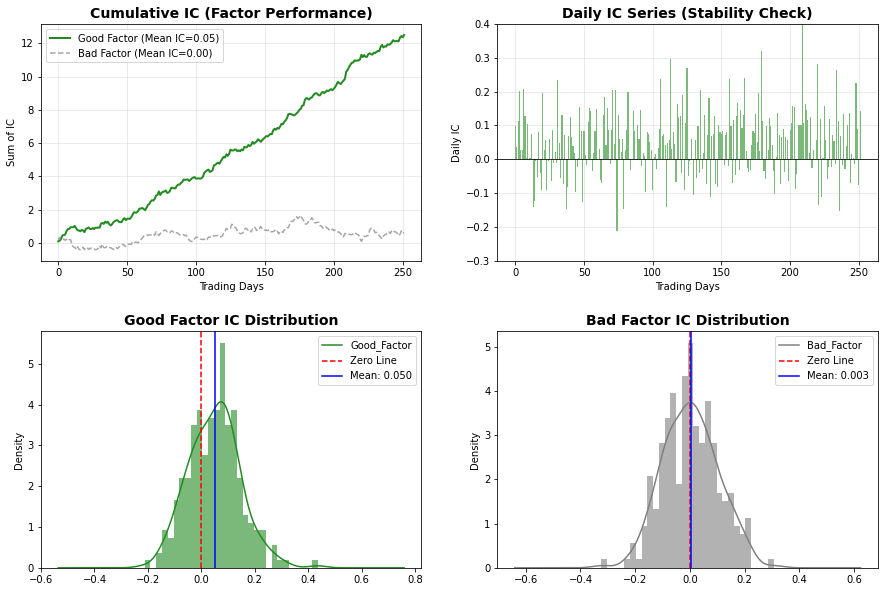

In [21]:
# 设置随机种子
np.random.seed(42)

# 模拟参数
n_days = 252  # 一年的交易日

# 1. 模拟“有效因子”的 IC 序列
# 假设 IC 服从正态分布，均值为 0.05 (非常强)，标准差为 0.1
ic_good = np.random.normal(loc=0.05, scale=0.1, size=n_days)

# 2. 模拟“无效因子”的 IC 序列
# 均值为 0，标准差为 0.1
ic_bad = np.random.normal(loc=0.00, scale=0.1, size=n_days)

# 创建 DataFrame
df_ic = pd.DataFrame({
    'Good_Factor': ic_good,
    'Bad_Factor': ic_bad
})

# 计算累积 IC (Cumulative IC)
# 累积 IC 曲线不仅展示了收益能力，还展示了稳定性
df_cumsum = df_ic.cumsum()

# --- 绘图 ---
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
plt.subplots_adjust(hspace=0.3)

# 图1: 累积 IC 曲线 (最重要的图)
_ = axes[0, 0].plot(df_cumsum['Good_Factor'], label='Good Factor (Mean IC=0.05)', color='forestgreen', linewidth=2)
_ = axes[0, 0].plot(df_cumsum['Bad_Factor'], label='Bad Factor (Mean IC=0.00)', color='gray', linestyle='--', alpha=0.7)
_ = axes[0, 0].set_title('Cumulative IC (Factor Performance)', fontsize=14, fontweight='bold')
_ = axes[0, 0].set_xlabel('Trading Days')
_ = axes[0, 0].set_ylabel('Sum of IC')
_ = axes[0, 0].legend()
_ = axes[0, 0].grid(True, alpha=0.3)

# 图2: IC 时间序列 (每日波动)
_ = axes[0, 1].bar(range(n_days), df_ic['Good_Factor'], color='forestgreen', alpha=0.6, label='Daily IC')
_ = axes[0, 1].axhline(0, color='black', linewidth=0.8)
_ = axes[0, 1].set_title('Daily IC Series (Stability Check)', fontsize=14, fontweight='bold')
_ = axes[0, 1].set_xlabel('Trading Days')
_ = axes[0, 1].set_ylabel('Daily IC')
_ = axes[0, 1].set_ylim(-0.3, 0.4)
_ = axes[0, 1].grid(True, alpha=0.3)

# 图3: Good Factor IC 分布直方图
_ = axes[1, 0].hist(df_ic['Good_Factor'], bins=30, density=True, color='forestgreen', alpha=0.6)
_ = df_ic['Good_Factor'].plot(kind='kde', ax=axes[1, 0], color='forestgreen')
_ = axes[1, 0].axvline(0, color='red', linestyle='--', label='Zero Line')
_ = axes[1, 0].axvline(df_ic['Good_Factor'].mean(), color='blue', linestyle='-', label=f"Mean: {df_ic['Good_Factor'].mean():.3f}")
_ = axes[1, 0].set_title('Good Factor IC Distribution', fontsize=14, fontweight='bold')
_ = axes[1, 0].legend()

# 图4: Bad Factor IC 分布直方图
_ = axes[1, 1].hist(df_ic['Bad_Factor'], bins=30, density=True, color='gray', alpha=0.6)
_ = df_ic['Bad_Factor'].plot(kind='kde', ax=axes[1, 1], color='gray')
_ = axes[1, 1].axvline(0, color='red', linestyle='--', label='Zero Line')
_ = axes[1, 1].axvline(df_ic['Bad_Factor'].mean(), color='blue', linestyle='-', label=f"Mean: {df_ic['Bad_Factor'].mean():.3f}")
_ = axes[1, 1].set_title('Bad Factor IC Distribution', fontsize=14, fontweight='bold')
_ = axes[1, 1].legend()

## 中性化 (Neutralization)

为什么必须做中性化？为了确保挖掘的因子是**纯粹的 Alpha**，而不是某种已知的风险风格 (如小盘股效应)。

建立截面回归方程：

$$
\mathbf{y}_{\text{new}} = c_1 \mathbf{X}_{\text{size}} + c_2 \mathbf{X}_{\text{sector}} + \dots + \mathbf{\epsilon}
$$

*   **$y$ (因变量)**: 挖掘出的原始因子值 (Z-Score)。
*   **$X$ (自变量)**: 现有的 Barra 因子暴露 (市值 Log，行业 Dummy 等)。
*   **$\epsilon$ (残差)**: **这就是纯 Alpha**。

**直观理解**：残差 $\epsilon$ 代表了新因子中**不能**被市值、行业等旧因素解释的独特部分。

## 使用机器学习挖掘因子

现代量化 (如 WorldQuant) 使用 ML 算法自动寻找公式，而非人工猜测。

### 方法一：遗传规划 (Genetic Programming)
*   **原理**：像生物进化一样“繁殖”公式。
*   **过程**：
    1.  随机生成 1000 个公式 (如 `Rank(Close) - Rank(Vol)`)。
    2.  计算每个公式的 IC (适应度)。
    3.  保留好的，进行交叉 (Crossover) 和 变异 (Mutation)。
    4.  重复迭代，直到找到高 IC 的公式。
*   **工具**: `gplearn` (Python)。

### 方法二：深度学习 (Deep Learning / GBDT)
*   **原理**：将神经网络本身视为一个巨大的非线性因子。
*   **输入**: 所有的量价数据、技术指标。
*   **模型**: LSTM, Transformer, LightGBM.
*   **输出**: 预测的收益率 (Score)。
*   **用法**: 将输出的 Score 作为一个 Barra 因子，进行中性化和测试。